# Data Cleaning

## Quick summary

In [ ]:
import pandas as pd
import numpy as np
# Create a sample DataFrame
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [5, 6, 7, 8, 9],
    'C': [10, 11, 12, 13, 14]
}
df = pd.DataFrame(data)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       5 non-null      int64
 1   B       5 non-null      int64
 2   C       5 non-null      int64
dtypes: int64(3)
memory usage: 248.0 bytes


In [ ]:
df.describe(include='all')

A         B          C
count  5.000000  5.000000   5.000000
mean   3.000000  7.000000  12.000000
std    1.581139  1.581139   1.581139
min    1.000000  5.000000  10.000000
25%    2.000000  6.000000  11.000000
50%    3.000000  7.000000  12.000000
75%    4.000000  8.000000  13.000000
max    5.000000  9.000000  14.000000

In [ ]:
df = pd.DataFrame({'categorical': pd.Categorical(['d', 'e', 'f']),
                   'numeric': [1, 2, 3],
                   'object': ['a', 'b', 'c']
                   })
df.describe(include='all')
#df.describe(include=[np.number])
#df.describe(exclude=[np.number])

categorical  numeric object
count            3      3.0      3
unique           3      NaN      3
top              d      NaN      a
freq             1      NaN      1
mean           NaN      2.0    NaN
std            NaN      1.0    NaN
min            NaN      1.0    NaN
25%            NaN      1.5    NaN
50%            NaN      2.0    NaN
75%            NaN      2.5    NaN
max            NaN      3.0    NaN

## Data filtering

In [ ]:
data = {'Age':[25,30,35,40,45],
        'Gender':['M','F','M','F','M'],
        'Income':[50000,55000,60000,65000,70000]}
df = pd.DataFrame(data)

#條件過濾：年齡大於30的資料
filter_data=df[df['Age']>30]
#也可以用query
#filter_data=df.query('Age>30')
filter_data

Age Gender  Income
2   35      M   60000
3   40      F   65000
4   45      M   70000

In [ ]:
#條件過濾：只選擇年齡和收入兩個特徵
filter_data = df[['Age','Income']]
filter_data

Age  Income
0   25   50000
1   30   55000
2   35   60000
3   40   65000
4   45   70000

## Missing Value

### missing value check

In [ ]:
# Checking a single value
print(np.isnan(np.nan))  # Output: True

# Checking an array
my_array = np.array([1, 5, np.nan])
print(np.isnan(my_array))  # Output: [False False  True]

True
[False False  True]


In [ ]:
my_dataframe = pd.DataFrame({
    'Column1': ["I", "Love", np.nan],
    'Column2': ["Python", np.nan, "The Best"]
})

print(my_dataframe.isna())

print(my_dataframe.isnull())


   Column1  Column2
0    False    False
1    False     True
2     True    False
   Column1  Column2
0    False    False
1    False     True
2     True    False


### Handling Missing Value

In [ ]:
data = {'Age':[25,30,35,40,45],
        'Gender':['M','F','M',np.nan,'M'],
        'Income':[50000,55000,np.nan,65000,70000]}
df = pd.DataFrame(data)

#檢視缺失值
missing_values_count = df.isnull().sum()
print(missing_values_count)
#df.isnull().any(axis=1)
print(df.columns[df.isnull().any()].tolist())

Age       0
Gender    1
Income    1
dtype: int64
['Gender', 'Income']


In [ ]:
# Method1: 刪除含有缺失值的資料
df_dropna = df.dropna() #how='all' (default:any)
df_dropna

Age Gender   Income
0   25      M  50000.0
1   30      F  55000.0
4   45      M  70000.0

In [ ]:
# Method2: 使用平均值填充缺失值
df_filled = df['Income'].fillna(df['Income'].mean())
# 使用插值法填充缺失值
#df_filled = df['Income'].interpolate()
df_filled

0    50000.0
1    55000.0
2    60000.0
3    65000.0
4    70000.0
Name: Income, dtype: float64

In [ ]:
from sklearn.impute import KNNImputer

data = {'A':[1,2,np.nan,4,5],
        'B':[6,np.nan,8,9,10],
        'C':[11,12,13,np.nan,15]}
df = pd.DataFrame(data)

# Method3: 使用KNN進行補值
imputer = KNNImputer(n_neighbors=3)
data_filled = imputer.fit_transform(df)
print(data_filled)

[[ 1.          6.         11.        ]
 [ 2.          7.66666667 12.        ]
 [ 2.33333333  8.         13.        ]
 [ 4.          9.         13.33333333]
 [ 5.         10.         15.        ]]


## Handling duplicated values

In [ ]:
df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]})

df.drop_duplicates()
#針對特定欄去重
#df.drop_duplicates(subset=['brand'])
#針對特定欄去重, 並保留最後一筆資料
#df.drop_duplicates(subset=['brand', 'style'], keep='last')

brand style  rating
0  Yum Yum   cup     4.0
2  Indomie   cup     3.5
3  Indomie  pack    15.0
4  Indomie  pack     5.0

## Handling outlier

Old Shape:  (442, 10)


<Axes: ylabel='bmi'>

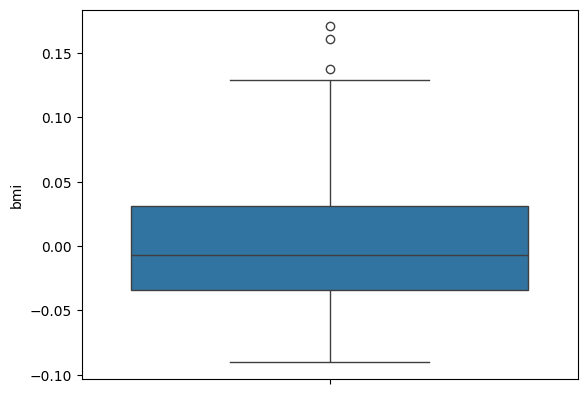

In [ ]:
# Importing
import sklearn
from sklearn.datasets import load_diabetes
import seaborn as sns

# Load the dataset
diabetes = load_diabetes()

# Create the dataframe
column_name = diabetes.feature_names
df_diabetes = pd.DataFrame(diabetes.data)
df_diabetes .columns = column_name
df_diabetes .head()
print("Old Shape: ", df_diabetes.shape)

# Box Plot
sns.boxplot(df_diabetes['bmi'])


New Shape:  (439, 10)


<Axes: ylabel='bmi'>

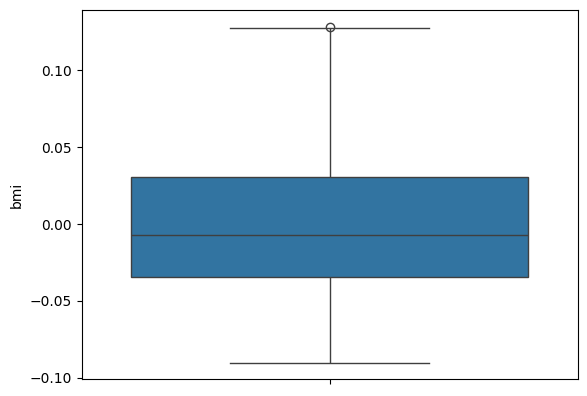

In [ ]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = df_diabetes['bmi'].quantile(0.25)
Q3 = df_diabetes['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df_diabetes['bmi'] >= upper)[0]
lower_array = np.where(df_diabetes['bmi'] <= lower)[0]

# Removing the outliers
df_diabetes.drop(index=upper_array, inplace=True)
df_diabetes.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df_diabetes.shape)
# Box Plot
sns.boxplot(df_diabetes['bmi'])


# Data Transformation

 ## Feature Selection

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
print(datasets.load_iris().DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
# load data to dict derived class Bunch
iris = datasets.load_iris()
target = datasets.load_iris().target


# convert to dataframe for processing
iris = pd.DataFrame(iris.data, columns = iris.feature_names)
iris.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

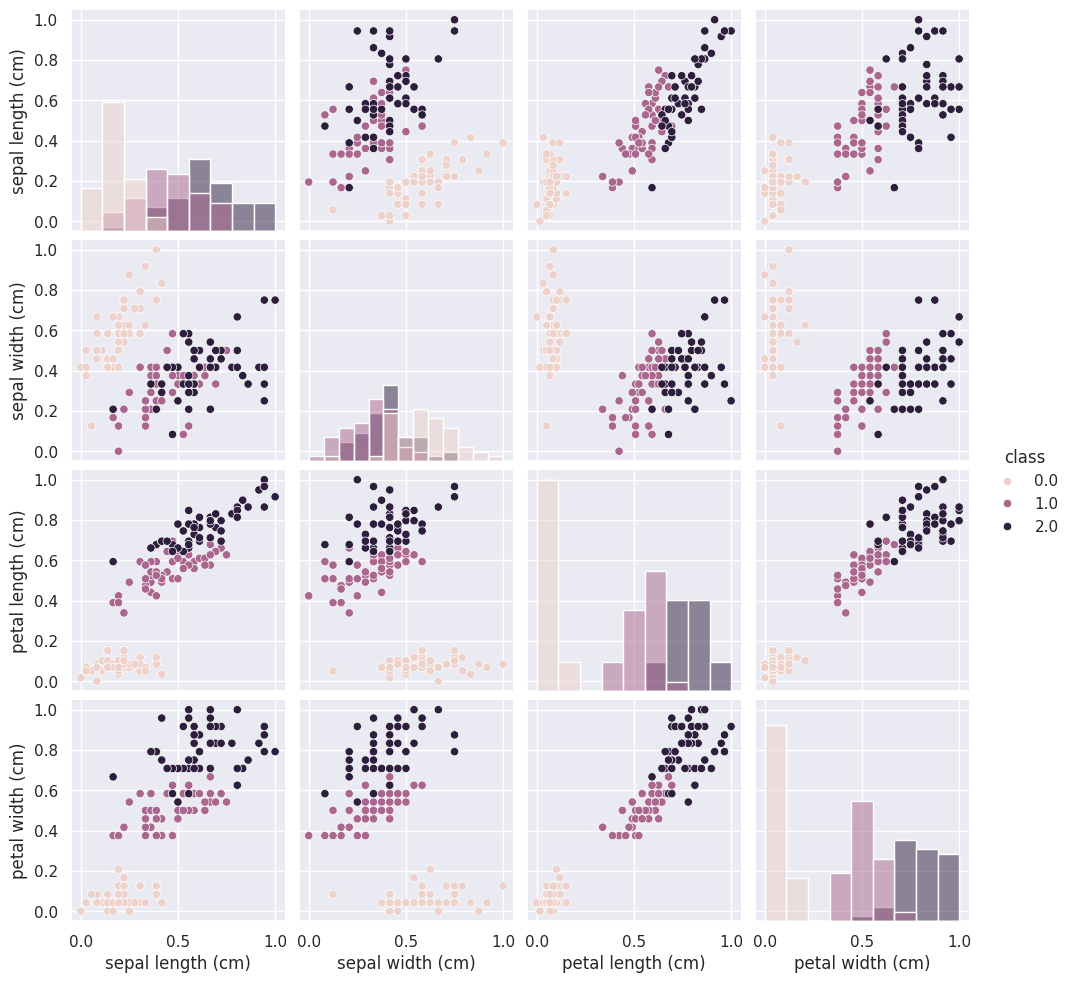

In [ ]:
#to normalize dataset, we use this handy MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(iris)
iris_norm=scaler.transform(iris)
# visualizing features and target
iris_norm = pd.DataFrame(iris_norm, columns = iris.columns)
iris_norm_ = pd.DataFrame(np.hstack((iris_norm, target[:, np.newaxis])), columns = iris.columns.tolist() + ['class'])
sns.pairplot(iris_norm_, hue = 'class', diag_kind='hist')

<Axes: >

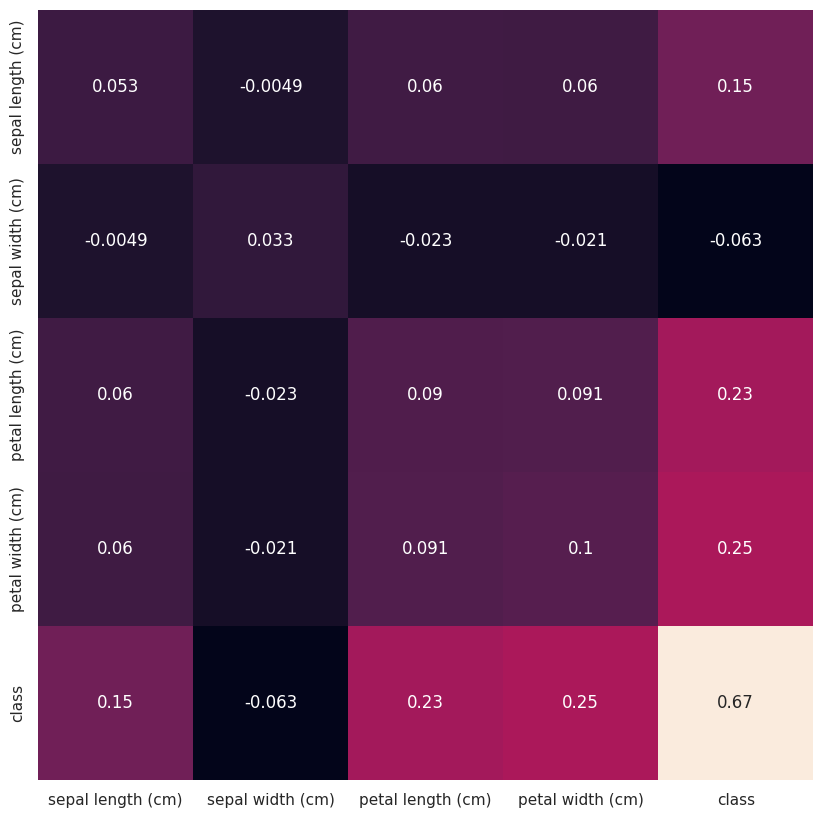

In [ ]:
# manually verify the correlation among features and classes
iris_cov = iris_norm_.cov()
sns.heatmap(iris_cov, annot = True, cbar = False)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
bestfeatures = SelectKBest(score_func=f_classif, k=3)
iris_trim = bestfeatures.fit_transform(iris_norm, target)
print(bestfeatures.scores_)
print(bestfeatures.pvalues_)
print(iris_trim.shape)

[ 119.26450218   49.16004009 1180.16118225  960.0071468 ]
[1.66966919e-31 4.49201713e-17 2.85677661e-91 4.16944584e-85]
(150, 3)


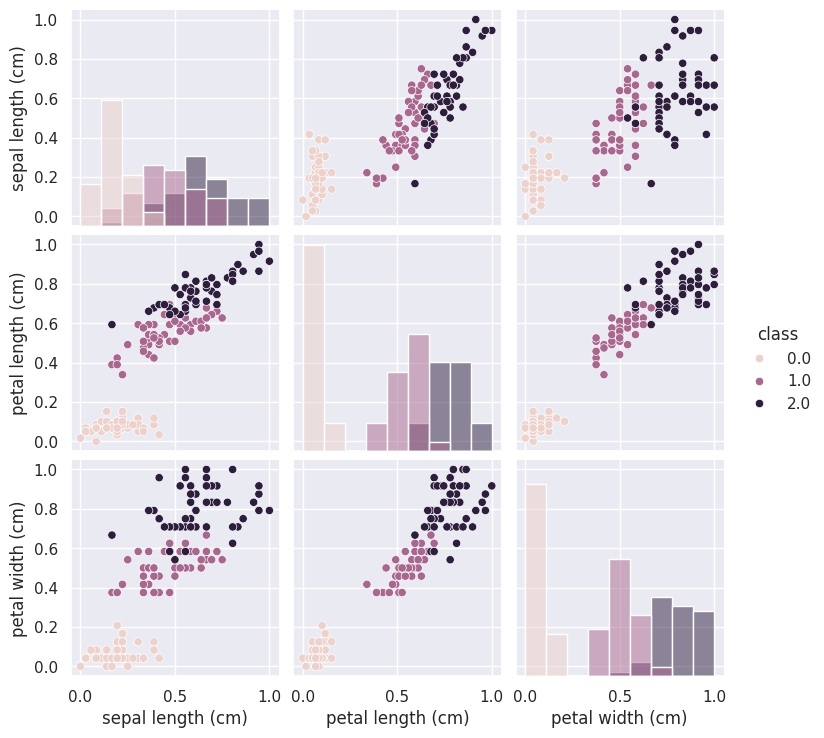

In [ ]:
# visualizing features and target
iris_trim = pd.DataFrame(iris_trim, columns = iris.columns[bestfeatures.get_support()])
iris_trim_norm_ = pd.DataFrame(np.hstack((iris_trim, target[:, np.newaxis])), columns = iris_trim.columns.tolist() + ['class'])
sns.pairplot(iris_trim_norm_, hue = 'class', diag_kind='hist')

In [ ]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
def train_and_validate(X_train, X_test, y_train, y_test):
    mode = GaussianNB()#DecisionTreeClassifier(max_depth=3)
    mode.fit(X_train, y_train);
    y_calc = mode.predict(X_test)
    #y_prob = mode.predict_proba(X_test)
    #print(y_prob)
    mat =  metrics.confusion_matrix(y_test, y_calc)
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(mat.T, annot=True, cbar = False)
X_train4, X_test4, y_train, y_test = train_test_split(iris_norm, target, test_size = 0.3, stratify = None, random_state=42)
X_train3, X_test3 = X_train4.drop(['sepal width (cm)'], axis=1), X_test4.drop(['sepal width (cm)'], axis=1)

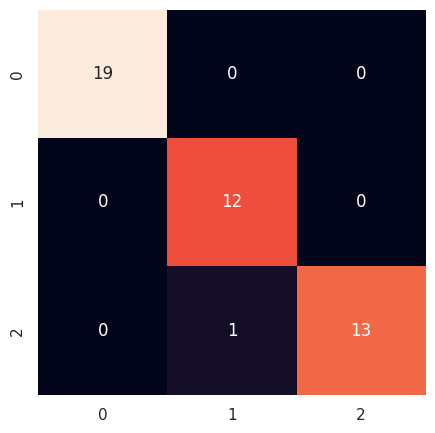

In [ ]:
train_and_validate(X_train4, X_test4, y_train, y_test)

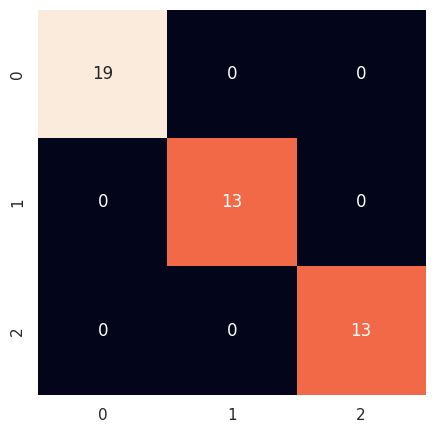

In [ ]:
train_and_validate(X_train3, X_test3, y_train, y_test)

### Filter Method

In [ ]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
pd.DataFrame(data=iris.data,columns = iris.feature_names)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

In [ ]:
#根據閾值選擇方差大於閾值的特徵
VarianceThreshold(threshold=3).fit_transform(iris.data)
#卡方檢驗是檢驗自變量與因變量的相關性
#SelectKBest(chi2,k=2).fit_transform(iris.data,iris.target)


array([[1.4],
       [1.4],
       [1.3],
       [1.5],
       [1.4],
       [1.7],
       [1.4],
       [1.5],
       [1.4],
       [1.5],
       [1.5],
       [1.6],
       [1.4],
       [1.1],
       [1.2],
       [1.5],
       [1.3],
       [1.4],
       [1.7],
       [1.5],
       [1.7],
       [1.5],
       [1. ],
       [1.7],
       [1.9],
       [1.6],
       [1.6],
       [1.5],
       [1.4],
       [1.6],
       [1.6],
       [1.5],
       [1.5],
       [1.4],
       [1.5],
       [1.2],
       [1.3],
       [1.4],
       [1.3],
       [1.5],
       [1.3],
       [1.3],
       [1.3],
       [1.6],
       [1.9],
       [1.4],
       [1.6],
       [1.4],
       [1.5],
       [1.4],
       [4.7],
       [4.5],
       [4.9],
       [4. ],
       [4.6],
       [4.5],
       [4.7],
       [3.3],
       [4.6],
       [3.9],
       [3.5],
       [4.2],
       [4. ],
       [4.7],
       [3.6],
       [4.4],
       [4.5],
       [4.1],
       [4.5],
       [3.9],
       [4.8],
      

### Wrapped Method

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

estimator = LogisticRegression(solver='lbfgs',multi_class='auto',max_iter=1000)
slector=RFE(estimator,n_features_to_select=2,step=1)
selector=slector.fit(X,y)


print("Select features:",[feature for feature, selected in zip(feature_names,selector.support_) if selected])

Select features: ['petal length (cm)', 'petal width (cm)']


### Embedded Method

In [ ]:
from sklearn.linear_model import Lasso
import numpy as np

X = iris.data
y = iris.target
feature_names = iris.feature_names

#使用Lasso回歸進行特徵選擇
lasso = Lasso(alpha=0.1)
lasso.fit(X,y)

selected_features=np.array(iris.feature_names)[lasso.coef_!=0]
print("Select features:",selected_features)

Select features: ['petal length (cm)']


## Dimension Reduction

#### Principle Component Analysis(PCA)

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn import datasets

iris=datasets.load_iris()
X=iris.data
pca=PCA(n_components=2)
pca.fit(X).transform(X)

#看特徵數量: (注意，這是經過映射後的新特徵，而非原本特徵的刪除)
print(pca.n_components_)

#看新特徵的解釋能力:
print(pca.explained_variance_ratio_)

#把解釋能力累加起來，看看我們總共保留了多少特徵貢獻度。
print(np.cumsum(pca.explained_variance_ratio_))


2
[0.92461872 0.05306648]
[0.92461872 0.97768521]


#### t-distributed stochastic neighbor embedding(t-SNE)

In [ ]:
import plotly.express as px
from sklearn.datasets import make_classification
X, y = make_classification(
    n_features=6,
    n_classes=3,
    n_samples=1500,
    n_informative=2,
    random_state=5,
    n_clusters_per_class=1,
)
fig = px.scatter_3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], color=y, opacity=0.8)
fig.update_traces(marker=dict(size=3))
fig.show()


In [ ]:
#t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
tsne.kl_divergence_

fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=y)
fig.update_layout(
    title="t-SNE visualization of Custom Classification dataset",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

In [ ]:
#PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

fig = px.scatter(x=X_pca[:, 0], y=X_pca[:, 1], color=y)

fig.update_layout(
    title="PCA visualization of Custom Classification dataset",
    xaxis_title="First Principal Component",
    yaxis_title="Second Principal Component"
)

fig.show()


11490434/11490434 [==============================] - 0s 0us/step
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.002s...
[t-SNE] Computed neighbors for 3000 samples in 0.577s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 607.882415
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.417206
[t-SNE] KL divergence after 1000 iterations: 1.286376


[Text(0.5, 1.0, 'MNIST data T-SNE projection')]

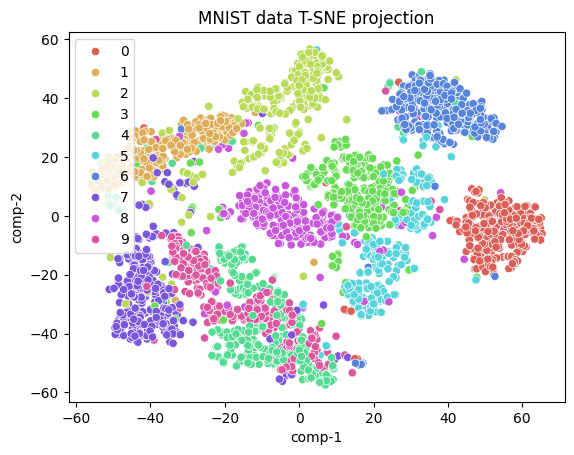

In [ ]:
from keras.datasets import mnist
from numpy import reshape
import seaborn as sns

(x_train, y_train), (_ , _) = mnist.load_data()
x_train = x_train[:3000]
y_train = y_train[:3000]

x_mnist = reshape(x_train, [x_train.shape[0], x_train.shape[1]*x_train.shape[2]])

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x_mnist)

df = pd.DataFrame()
df["y"] = y_train
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),palette=sns.color_palette("hls", 10),
                data=df).set(title="MNIST data T-SNE projection")

## Data Type Transformation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer,Binarizer

data = pd.DataFrame({
    'age': [25,45,37,19,55,28,35,40],
    'income': [50000,70000,55000,30000,80000,48000,60000,65000]})

#分箱法(Binning)
age_discretizer = KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='uniform')
data['age_category']=age_discretizer.fit_transform(data['age'].values.reshape(-1,1))

#分位數法(Quantile-based discretization)
income_discretizer = KBinsDiscretizer(n_bins=4,encode='ordinal',strategy='quantile') #以四分位數為分界點
data['income_category']=income_discretizer.fit_transform(data['income'].values.reshape(-1,1))

#二值化(Binarization)
binarizer = Binarizer(threshold=50000) #以50000為分界點，大於則為1,小於則為0
data['high_income'] = binarizer.fit_transform(data['income'].values.reshape(-1,1))

print(data)


   age  income  age_category  income_category  high_income
0   25   50000           0.0              1.0            0
1   45   70000           2.0              3.0            1
2   37   55000           1.0              1.0            1
3   19   30000           0.0              0.0            0
4   55   80000           2.0              3.0            1
5   28   48000           0.0              0.0            0
6   35   60000           1.0              2.0            1
7   40   65000           1.0              2.0            1


## Enconding

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

data = {'Category':['A','B','A','C','B','C']}
df = pd.DataFrame(data)
#Label Encoding
encoder = LabelEncoder()
df['Encoded_Category']=encoder.fit_transform(df['Category'])
print(df)

#One-Hot Encoding
OneHot_encoder = OneHotEncoder()
encoded_data=OneHot_encoder.fit_transform(df[['Category']]).toarray()
encoded_df = pd.DataFrame(encoded_data,columns = OneHot_encoder.categories_)
print(encoded_df)

#Target Encoding
data = {'Category':['A','B','A','C','B','C'], 'Target':[1,0,1,0,0,1]}
df_Target = pd.DataFrame(data)
mean_encoding = df_Target.groupby('Category')['Target'].mean()
df_Target['Encoded_Category'] = df_Target['Category'].map(mean_encoding)
print(df_Target)


  Category  Encoded_Category
0        A                 0
1        B                 1
2        A                 0
3        C                 2
4        B                 1
5        C                 2
     A    B    C
0  1.0  0.0  0.0
1  0.0  1.0  0.0
2  1.0  0.0  0.0
3  0.0  0.0  1.0
4  0.0  1.0  0.0
5  0.0  0.0  1.0
  Category  Target  Encoded_Category
0        A       1               1.0
1        B       0               0.0
2        A       1               1.0
3        C       0               0.5
4        B       0               0.0
5        C       1               0.5


## Data Scaling

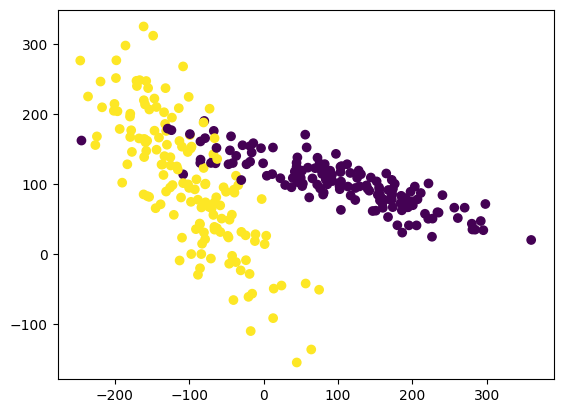

0.9222222222222223

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.svm import SVC
import matplotlib.pyplot as plt
# Generate Data
X,y = make_classification(n_samples=300,n_features=2,
         n_redundant=0, n_informative=2,random_state=22,
         scale=100, n_clusters_per_class=1)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#Original Data performance
clf = SVC()
clf.fit(X_train,y_train)
clf.score(X_test,y_test) #0.92222

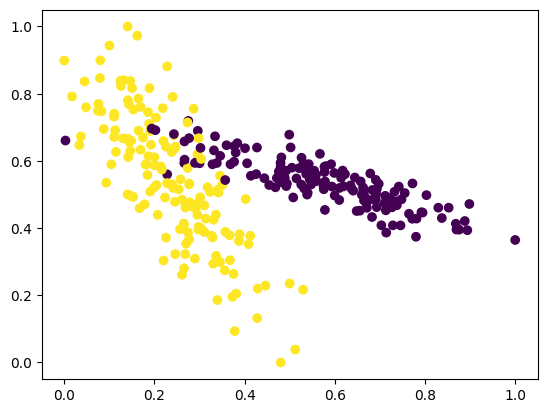

0.9333333333333333


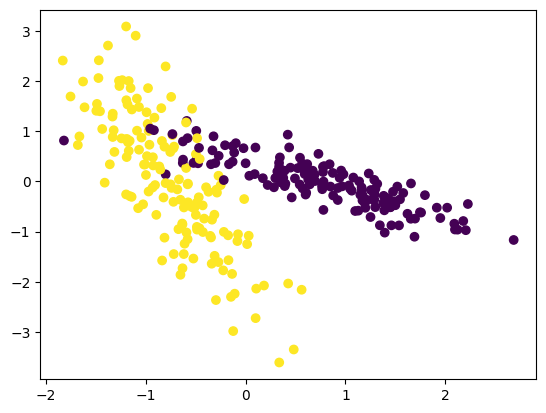

0.9333333333333333


In [ ]:
#Min-Max Normalination
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(normalized_data,y,test_size=0.3,random_state=42)
clf = SVC()
plt.scatter(normalized_data[:,0],normalized_data[:,1],c=y)
plt.show()
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))

#Standardization
scaler = StandardScaler()
standardized_data = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(standardized_data,y,test_size=0.3,random_state=42)
clf = SVC()
plt.scatter(standardized_data[:,0],standardized_data[:,1],c=y)
plt.show()
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))

## Distribution Transformation

Lambda value used for Transformation: 0.25805354589372187


<ipython-input-37-1333c0fd728a>:14: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-37-1333c0fd728a>:16: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new 

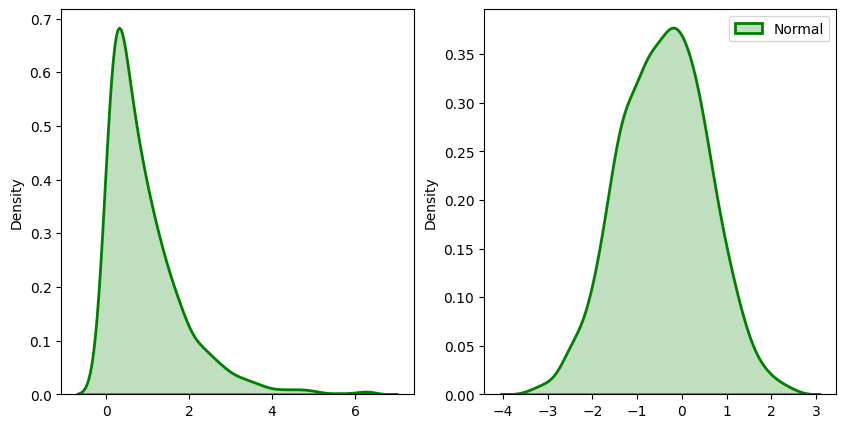

In [ ]:
# import modules
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# generate non-normal data (exponential)
original_data = np.random.exponential(size = 1000)
 # transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(original_data)
fig, ax = plt.subplots(1, 2)

# plotting the original data(non-normal) and  fitted data (normal)
sns.distplot(original_data, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2},
      label = "Non-Normal", color ="green", ax = ax[0])
sns.distplot(fitted_data, hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 2},
      label = "Normal", color ="green", ax = ax[1])
plt.legend(loc = "upper right")
fig.set_figheight(5)
fig.set_figwidth(10)
print(f"Lambda value used for Transformation: {fitted_lambda}")

偏度(Skewness): 0.98, 峰度(Kurtosis): 0.75


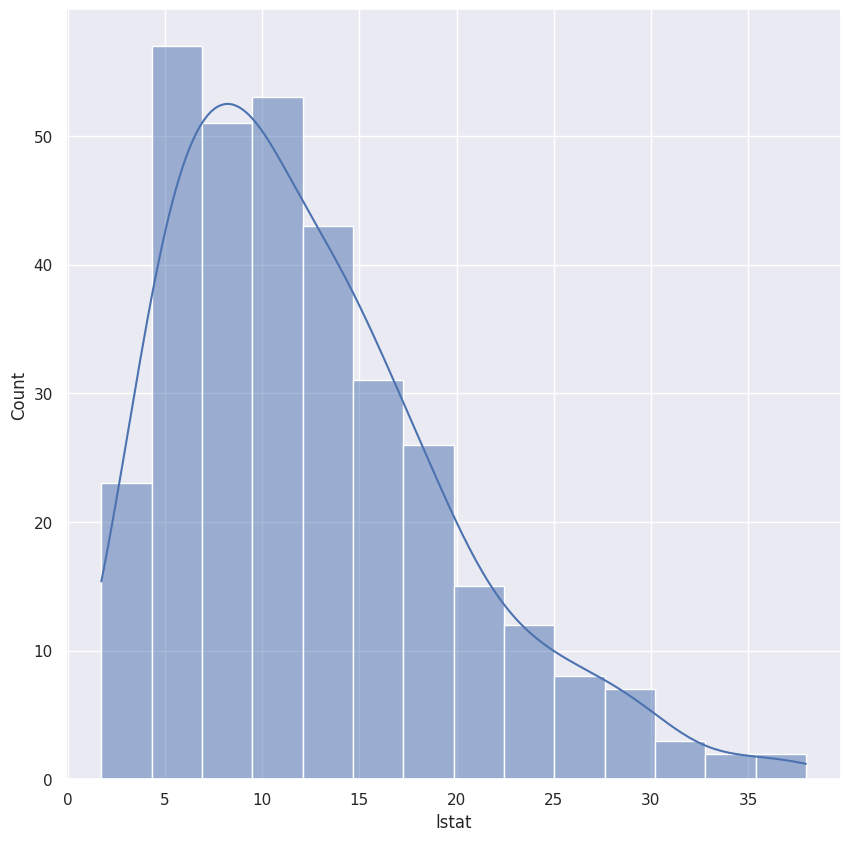

偏度(Skewness): -0.17, 峰度(Kurtosis): -0.5


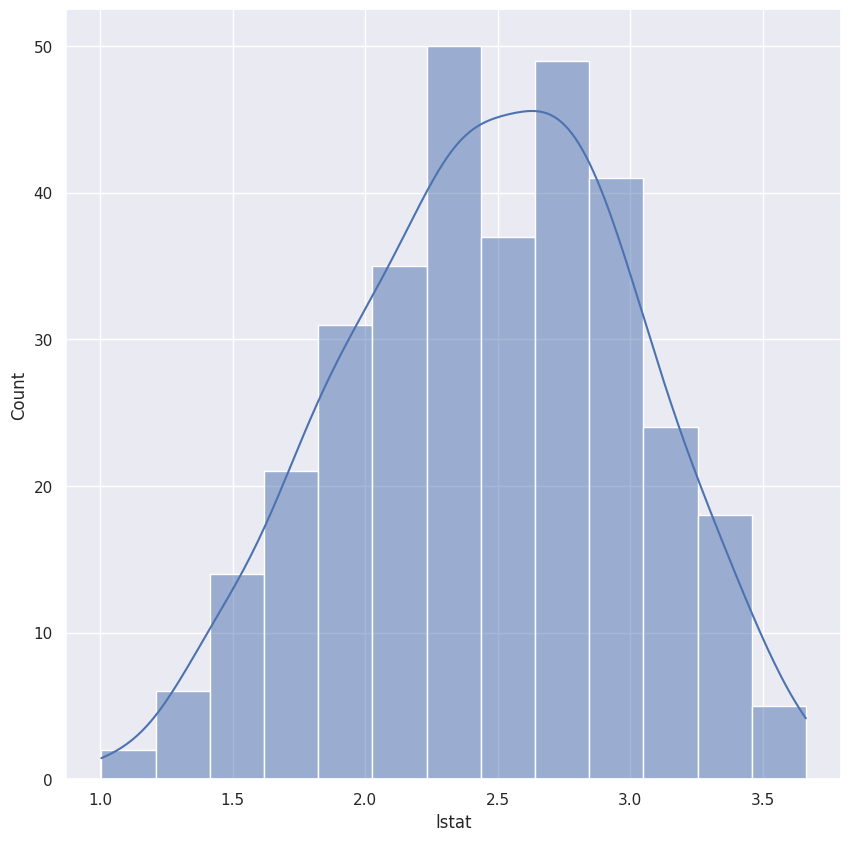

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
# 載入資料集
#California = fetch_california_housing()
#housing = pd.DataFrame(California.data, columns=California.feature_names)
housing = pd.read_csv('https://raw.githubusercontent.com/WangchanTW/Pyladies_DataAnalysis/main/bhprice_train.csv')
skewness = round(housing['lstat'].skew(), 2) #lstat #Population
kurtosis = round(housing['lstat'].kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")
# 繪製分布圖
sns.histplot(housing['lstat'], kde=True)
plt.show()

transform_data = np.log1p(housing['lstat'])
skewness = round(transform_data.skew(), 2)
kurtosis = round(transform_data.kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")
sns.histplot(transform_data, kde=True)
plt.show()


In [ ]:
Boston

ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0      1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1      2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2      4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
3      5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
4      7  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   
..   ...      ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
328  500  0.17783   0.0   9.69     0  0.585  5.569  73.5  2.3999    6  391   
329  502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
330  503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
331  504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
332  506  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio   black  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       18.7  394.63   2.94  33.4  
3       18.7  396.90   5.33  36.2  
4       15.2  395.60  12.43  22.9  
..       ...     ...    ...   ...  
328     19.2  395.77  15.10  17.5  
329     21.0  391.99   9.67  22.4  
330     21.0  396.90   9.08  20.6  
331     21.0  396.90   5.64  23.9  
332     21.0  396.90   7.88  11.9  

[333 rows x 15 columns]

# Data Combination

## Merge

In [ ]:
import pandas as pd
df1 = pd.DataFrame({'Key':['B','C','D','E'],'T1':['#','@','=','$']})
df2 = pd.DataFrame({'Key':['A','B','C','F'],'T2':[10, 15, 20, 60]})

# default inner join
Inner_df = pd.merge(df1,df2, on="Key")
print(Inner_df.sort_values(by='Key'))

# Left join
Left_df = pd.merge(df1,df2, on="Key",how = 'left')

# Right join
Right_df = pd.merge(df1,df2, on="Key",how = 'right')

# Outer join
Outer_df = pd.merge(df1,df2, on="Key",how = 'outer')

# Cross join
Cross_df = df1.merge(df2,how = 'cross')

  Key T1  T2
0   B  #  15
1   C  @  20


### Merge_asof

In [ ]:
import pandas as pd
quotes = pd.DataFrame( {
        "time": [ pd.Timestamp("2016-05-25 13:30:00.023"), pd.Timestamp("2016-05-25 13:30:00.023"),
            pd.Timestamp("2016-05-25 13:30:00.030"), pd.Timestamp("2016-05-25 13:30:00.041"),
            pd.Timestamp("2016-05-25 13:30:00.048"), pd.Timestamp("2016-05-25 13:30:00.049"),
            pd.Timestamp("2016-05-25 13:30:00.072"), pd.Timestamp("2016-05-25 13:30:00.075")],
        "ticker": ["GOOG","MSFT","MSFT","MSFT", "GOOG", "AAPL","GOOG","MSFT" ],
        "bid": [720.50, 51.95, 51.97, 51.99, 720.50, 97.99, 720.50, 52.01],
        "ask": [720.93, 51.96, 51.98, 52.00, 720.93, 98.01, 720.88, 52.03]})

trades = pd.DataFrame({
        "time": [ pd.Timestamp("2016-05-25 13:30:00.023"),pd.Timestamp("2016-05-25 13:30:00.038"),
            pd.Timestamp("2016-05-25 13:30:00.048"),pd.Timestamp("2016-05-25 13:30:00.048"),
            pd.Timestamp("2016-05-25 13:30:00.048")],
        "ticker": ["MSFT", "MSFT", "GOOG", "GOOG", "AAPL"],
        "price": [51.95, 51.95, 720.77, 720.92, 98.0],
        "quantity": [75, 155, 100, 100, 100]})

quotes = quotes.sort_values(by='time')
trades = trades.sort_values(by='time')
result = pd.merge_asof(trades,quotes,on='time',by='ticker',allow_exact_matches=False)#,tolerance=pd.Timedelta('10ms')
print(result.dropna(subset=['bid','ask']))

                     time ticker   price  quantity     bid     ask
1 2016-05-25 13:30:00.038   MSFT   51.95       155   51.97   51.98
2 2016-05-25 13:30:00.048   GOOG  720.77       100  720.50  720.93
3 2016-05-25 13:30:00.048   GOOG  720.92       100  720.50  720.93


In [ ]:
data1 = {'name': ['John', 'Judy', 'Amy', 'Ben', 'Lily'], 'score': [60, 72, 80, 88, 95]}
data2 = {'score': [0, 70, 80, 90], 'grade': ['F', 'C', 'B', 'A']}
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
pd.merge_asof(df1,df2,on='score')

name  score grade
0  John     60     F
1  Judy     72     C
2   Amy     80     B
3   Ben     88     B
4  Lily     95     A

## Join

In [ ]:
import pandas as pd

df1 = pd.DataFrame({'A': [1, 2, 3], 'B': ['a', 'b', 'c']},index=['1','2','3'])
df2 = pd.DataFrame({'C': [4, 5, 6], 'D': ['x', 'y', 'z']},index=['1','2','3'])

# Joining df2 to df1 based on index
joined_df = df1.join(df2)
print(joined_df)

   A  B  C  D
1  1  a  4  x
2  2  b  5  y
3  3  c  6  z


In [ ]:
result_join = df1.join(df2,how='inner')
print(result_join)
#等價於
result_merge = pd.merge(df1,df2,left_index=True,right_index=True)
print(result_merge)


   A  B  C  D
1  1  a  4  x
2  2  b  5  y
3  3  c  6  z
   A  B  C  D
1  1  a  4  x
2  2  b  5  y
3  3  c  6  z


## Append

In [ ]:
import pandas as pd

df1 = pd.DataFrame({'A': [1, 2, 3], 'B': ['a', 'b', 'c']})
df2 = pd.DataFrame({'A': [4, 5, 6], 'B': ['x', 'y', 'z']})

# Appending df2 to df1
#appended_df = df1.append(df2, ignore_index=True)
appended_df = df1._append(df2, ignore_index=True)

print(appended_df)

   A  B
0  1  a
1  2  b
2  3  c
3  4  x
4  5  y
5  6  z


## concat

In [ ]:
import pandas as pd
df1 = pd.DataFrame({'A': [1, 2, 3], 'B': ['a', 'b', 'c']})
df2 = pd.DataFrame({'A': [4, 5, 6], 'B': ['x', 'y', 'z']})

# Concatenating df1 and df2 along rows (axis=0)
# same as df1.append(df2)
concatenated_df_row = pd.concat([df1, df2])
print(concatenated_df_row)

# Concatenating df1 and df2 along columns (axis=1)
# same as pd.merge(df1,df2,how=’outer’)
concatenated_df_col = pd.concat([df1, df2], axis=1)
print(concatenated_df_col)

   A  B
0  1  a
1  2  b
2  3  c
0  4  x
1  5  y
2  6  z
   A  B  A  B
0  1  a  4  x
1  2  b  5  y
2  3  c  6  z


# Machine Learning

## Titaninc

In [ ]:
# loading package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(font_scale=1.56)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFECV

# for display dataframe
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
# ignore warning
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# loading data
df_train = pd.read_csv('https://raw.githubusercontent.com/WangchanTW/Pyladies_DataAnalysis/main/titanic_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/WangchanTW/Pyladies_DataAnalysis/main/titanic_test.csv')
df_data = pd.concat([df_train,df_test],ignore_index=True)
df_data.head(10)

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   
5            6       0.0       3   
6            7       0.0       1   
7            8       0.0       3   
8            9       1.0       3   
9           10       1.0       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

### EDA

Text(0.5, 1.0, 'train feature corr')

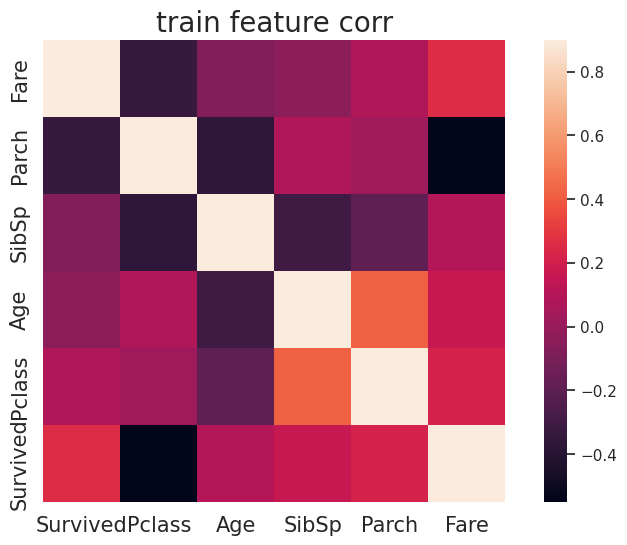

In [ ]:
sns.set(context="paper", font="monospace")
sns.set(style="white")
f, ax = plt.subplots(figsize=(10,6))
train_corr = df_train[['Survived','Pclass','Age','SibSp','Parch','Fare']].corr()
sns.heatmap(train_corr, ax=ax, vmax=.9, square=True)
ax.set_xticklabels(train_corr.index, size=15)
ax.set_yticklabels(train_corr.columns[::-1], size=15)
ax.set_title('train feature corr', fontsize=20)

Sex  Survived
0  female     0.742
1    male     0.189

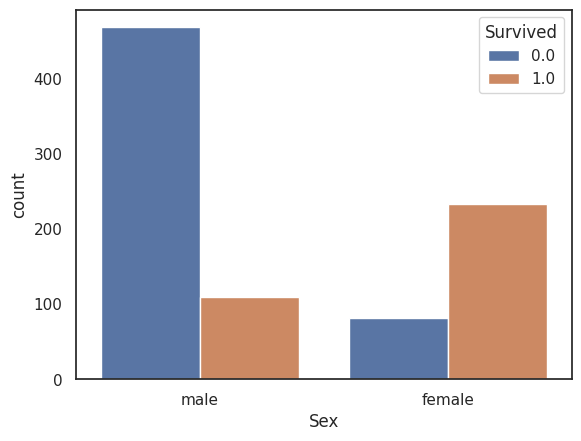

In [ ]:
sns.countplot(x='Sex', hue='Survived',data = df_data)
display(df_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().round(3))

Pclass  Survived
0       1     0.630
1       2     0.473
2       3     0.242

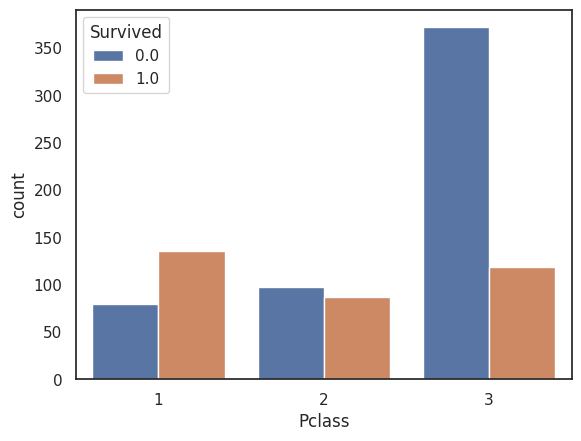

In [ ]:
sns.countplot(x='Pclass', hue='Survived',data = df_data)
display(df_data[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().round(3))

Embarked  Survived
0        C     0.554
1        Q     0.390
2        S     0.337

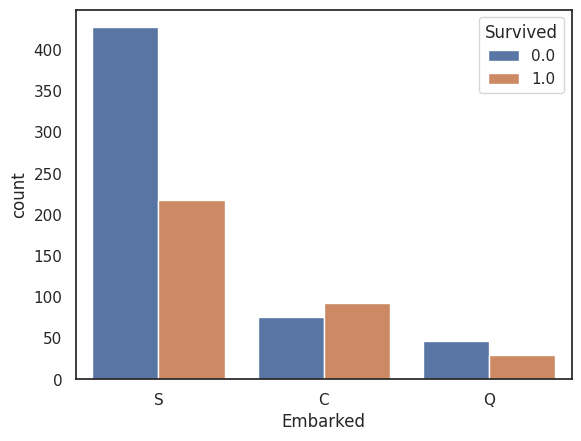

In [ ]:
sns.countplot(x='Embarked', hue='Survived',data = df_data)
display(df_data[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().round(3))

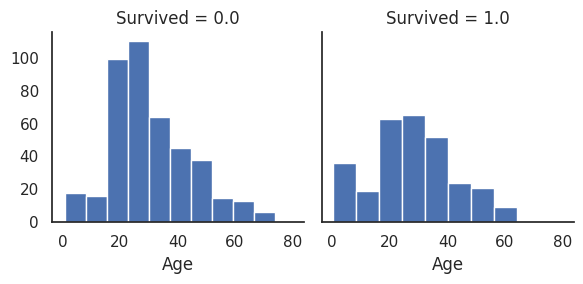

In [ ]:
#Age has data loss
g=sns.FacetGrid(df_data,col='Survived')
g.map(plt.hist,'Age')

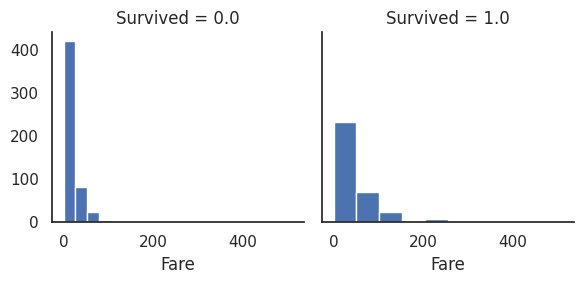

In [ ]:
g=sns.FacetGrid(df_data,col='Survived')
g.map(plt.hist,'Fare')

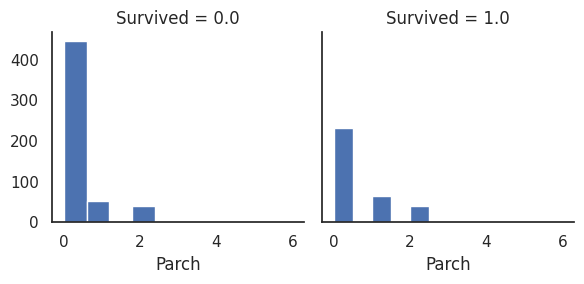

In [ ]:
g=sns.FacetGrid(df_data,col='Survived')
g.map(plt.hist,'Parch')

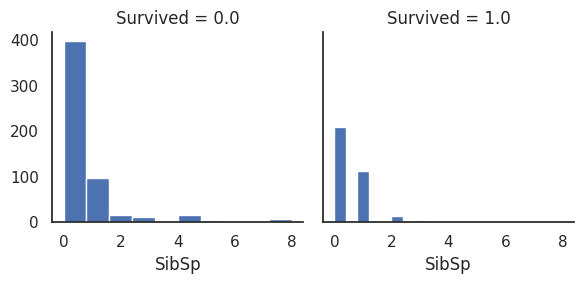

In [ ]:
g=sns.FacetGrid(df_data,col='Survived')
g.map(plt.hist,'SibSp')

In [ ]:
# Convert Sex
df_data['Sex_Code'] = df_data['Sex'].map({'female' : 1, 'male' : 0}).astype('int')

### Get Baseline

In [ ]:
# split training set the testing set
df_train = df_data[:len(df_train)]
df_test = df_data[len(df_train):]
# Inputs set and labels
X = df_train.drop(labels=['Survived','PassengerId'],axis=1)
Y = df_train['Survived']
# Show Baseline
Base = ['Sex_Code','Pclass']
Base_Model = RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20,oob_score=True)
Base_Model.fit(X[Base], Y)
print('Base oob score :%.5f' %(Base_Model.oob_score_))
# submission if you want
# submits
X_Submit = df_test.drop(labels=['PassengerId'],axis=1)

Base_pred = Base_Model.predict(X_Submit[Base])

submit = pd.DataFrame({"PassengerId": df_test['PassengerId'],
                      "Survived":Base_pred.astype(int)})
submit.to_csv("submit_Base.csv",index=False)

Base oob score :0.73176


### Feature Engineering

In [ ]:
### missing value
df_data['Embarked'] = df_data['Embarked'].fillna('S')
df_data['Fare'] = df_data['Fare'].fillna(df_data['Fare'].mean())

Fare        
Survived    0.0     1.0
Pclass                 
1         44.75  77.958
2         13.00  21.000
3          8.05   8.517

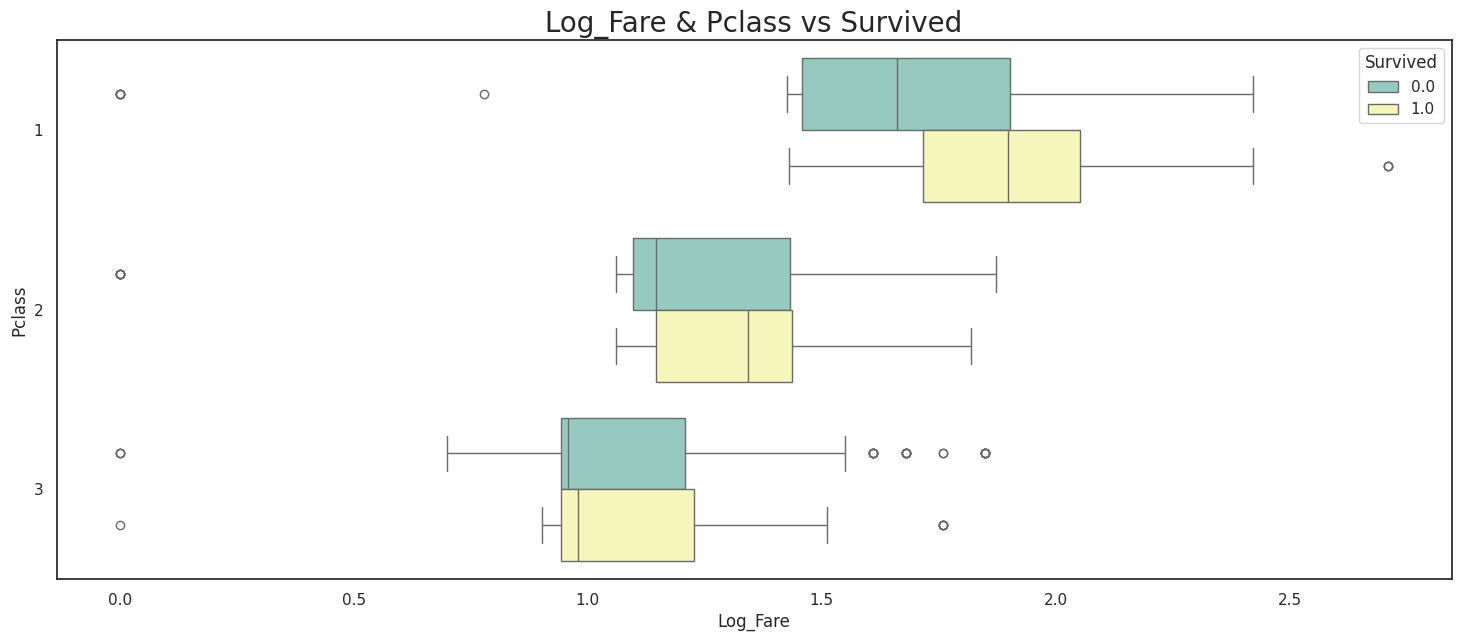

In [ ]:
fig, ax = plt.subplots( figsize = (18,7) )
df_data['Log_Fare'] = (df_data['Fare']+1).map(lambda x : np.log10(x) if x > 0 else 0)
sns.boxplot(y='Pclass', x='Log_Fare',hue='Survived',data=df_data, orient='h'
                ,ax=ax,palette="Set3")
ax.set_title(' Log_Fare & Pclass vs Survived ',fontsize = 20)
pd.pivot_table(df_data,values = ['Fare'], index = ['Pclass'], columns= ['Survived'] ,aggfunc = 'median' ).round(3)

Pclass 
 1 
 2 
 3 
 
 
 FareBin_Code_3 
 
 
 
 
 
 
 
 0 
 8 
 6 
 440 
 
 
 1 
 14 
 211 
 203 
 
 
 2 
 301 
 60 
 66 
 
 
 
 
 
 Pclass 
 1 
 2 
 3 
 
 
 FareBin_Code_4 
 
 
 
 
 
 
 
 0 
 8 
 6 
 323 
 
 
 1 
 0 
 128 
 192 
 
 
 2 
 77 
 104 
 147 
 
 
 3 
 238 
 39 
 47 
 
 
 
 
 
 Pclass 
 1 
 2 
 3 
 
 
 FareBin_Code_5 
 
 
 
 
 
 
 
 0 
 8 
 6 
 261 
 
 
 1 
 0 
 36 
 218 
 
 
 2 
 0 
 124 
 134 
 
 
 3 
 95 
 99 
 69 
 
 
 4 
 220 
 12 
 27

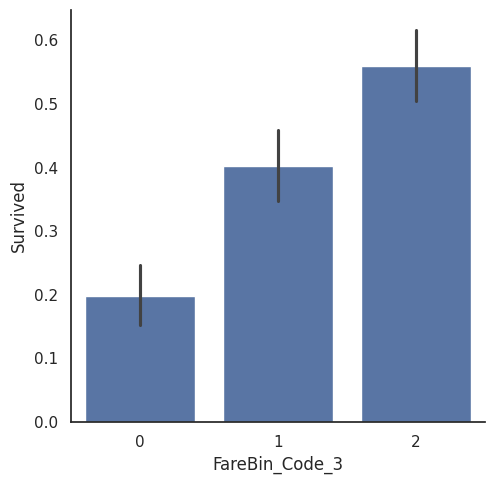

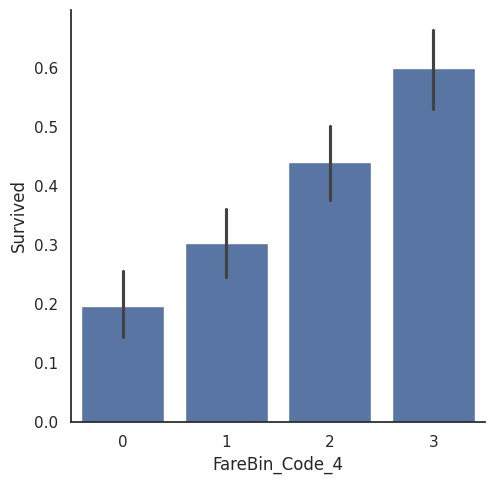

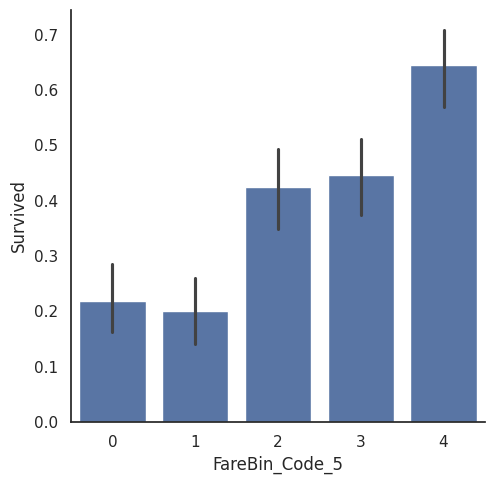

In [ ]:
# Making Bins
df_data['FareBin_3'] = pd.qcut(df_data['Fare'], 3)
df_data['FareBin_4'] = pd.qcut(df_data['Fare'], 4)
df_data['FareBin_5'] = pd.qcut(df_data['Fare'], 5)

label = LabelEncoder()
df_data['FareBin_Code_3'] = label.fit_transform(df_data['FareBin_3'])
df_data['FareBin_Code_4'] = label.fit_transform(df_data['FareBin_4'])
df_data['FareBin_Code_5'] = label.fit_transform(df_data['FareBin_5'])

# cross tab
df_3 = pd.crosstab(df_data['FareBin_Code_3'],df_data['Pclass'])
df_4 = pd.crosstab(df_data['FareBin_Code_4'],df_data['Pclass'])
df_5 = pd.crosstab(df_data['FareBin_Code_5'],df_data['Pclass'])

display_side_by_side(df_3,df_4,df_5)

# plots
fig
sns.catplot(x='FareBin_Code_3', y="Survived", data=df_data,kind='bar',height=5, aspect=1)
sns.catplot(x='FareBin_Code_4', y="Survived", data=df_data,kind='bar',height=5, aspect=1)
sns.catplot(x='FareBin_Code_5', y="Survived", data=df_data,kind='bar',height=5, aspect=1)

In [ ]:
# splits again beacuse we just engineered new feature
df_train = df_data[:len(df_train)]
df_test = df_data[len(df_train):]
# Training set and labels
X = df_train.drop(labels=['Survived','PassengerId'],axis=1)
Y = df_train['Survived']
# show columns
X.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Sex_Code', 'Log_Fare', 'FareBin_3', 'FareBin_4',
       'FareBin_5', 'FareBin_Code_3', 'FareBin_Code_4', 'FareBin_Code_5'],
      dtype='object')

In [ ]:
compare = ['Sex_Code','Pclass','FareBin_Code_3','FareBin_Code_4','FareBin_Code_5']
score_b3,score_b4, score_b5 = [], [], []
seeds = 10
for i in range(seeds):
    diff_cv = StratifiedKFold(n_splits=10,shuffle=True,random_state=i)
    selector = RFECV(RandomForestClassifier(random_state=i,n_estimators=250,min_samples_split=20),cv=diff_cv,n_jobs=-1)
    selector.fit(X[compare], Y)
    #print(selector.cv_results_)
    score_b3.append(selector.cv_results_['split3_test_score'])
    score_b4.append(selector.cv_results_['split4_test_score'])
    score_b5.append(selector.cv_results_['split5_test_score'])

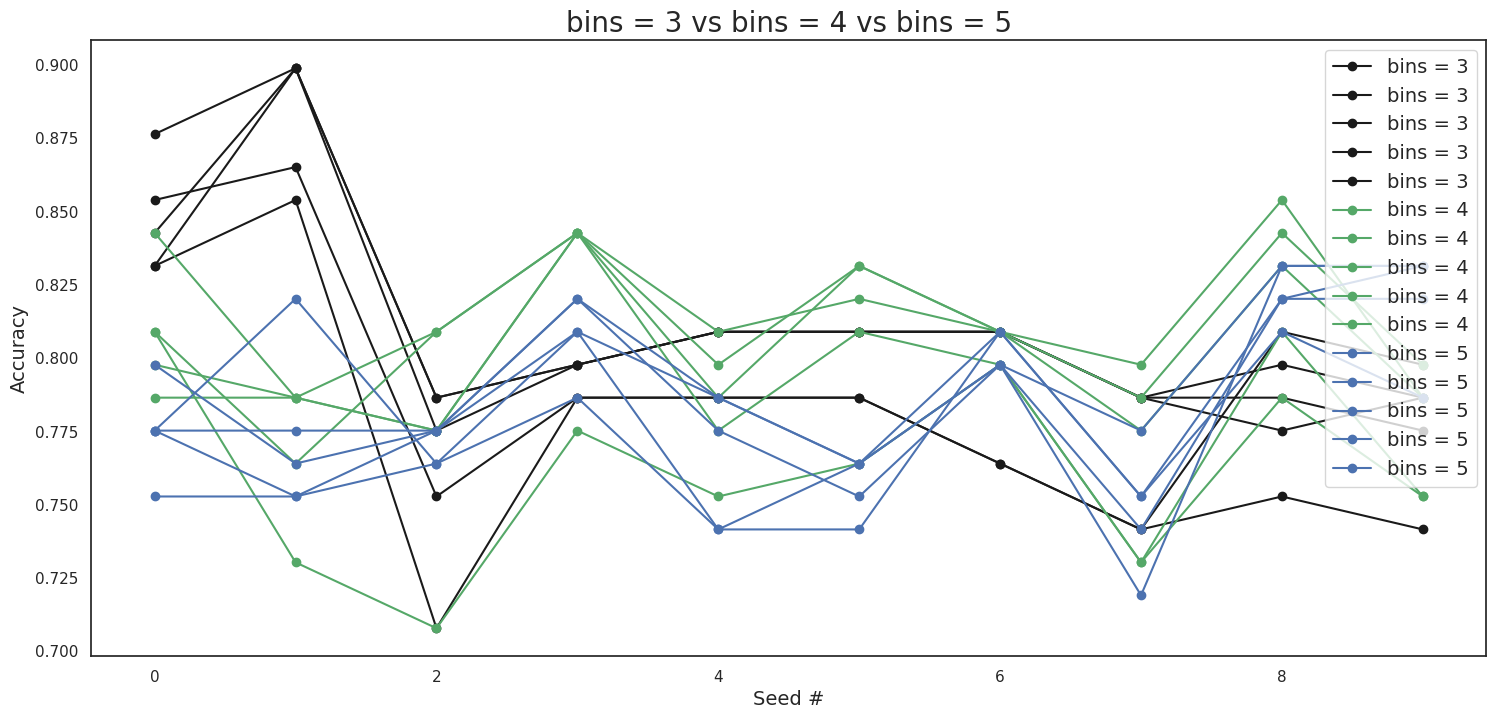

In [ ]:
# to np.array
score_list = [score_b3, score_b4, score_b5]
for item in score_list:
    item = np.array(item*100)
# plot
fig = plt.figure(figsize= (18,8) )
ax = plt.gca()
ax.plot(range(seeds), score_b3,'-ok',label='bins = 3')
ax.plot(range(seeds), score_b4,'-og',label='bins = 4')
ax.plot(range(seeds), score_b5,'-ob',label='bins = 5')
ax.set_xlabel("Seed #", fontsize = '14')
#ax.set_ylim(0.783,0.815)
ax.set_ylabel("Accuracy", fontsize = '14')
ax.set_title('bins = 3 vs bins = 4 vs bins = 5', fontsize='20')
plt.legend(fontsize = 14,loc='upper right')

In [ ]:
b3, b4, b5 = ['Sex_Code', 'Pclass','FareBin_Code_3'], ['Sex_Code','Pclass','FareBin_Code_4'],\
['Sex_Code','Pclass','FareBin_Code_5']
b3_Model = RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20,oob_score=True)
b3_Model.fit(X[b3], Y)
b4_Model = RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20,oob_score=True)
b4_Model.fit(X[b4], Y)
b5_Model = RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20,oob_score=True)
b5_Model.fit(X[b5], Y)
print('b3 oob score :%.5f' %(b3_Model.oob_score_))
print('b4 oob score :%.5f '%(b4_Model.oob_score_))
print('b5 oob score : %.5f' %(b5_Model.oob_score_))

b3 oob score :0.79574
b4 oob score :0.80584 
b5 oob score : 0.81033


In [ ]:
df_train['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

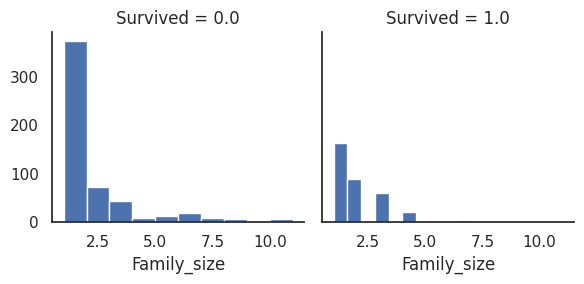

In [ ]:
df_data['Family_size'] = df_data['SibSp'] + df_data['Parch'] + 1
g=sns.FacetGrid(df_data,col='Survived')
g.map(plt.hist,'Family_size')

In [ ]:
deplicate_ticket = []
for tk in df_data.Ticket.unique():
    tem = df_data.loc[df_data.Ticket == tk, 'Fare']
    #print(tem.count())
    if tem.count() > 1:
        #print(df_data.loc[df_data.Ticket == tk,['Name','Ticket','Fare']])
        deplicate_ticket.append(df_data.loc[df_data.Ticket == tk,['Name','Ticket','Fare','Cabin','Family_size','Survived']])
deplicate_ticket = pd.concat(deplicate_ticket)
deplicate_ticket.head(14)

Name    Ticket     Fare  \
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  PC 17599  71.2833   
1125                          Cumings, Mr. John Bradley  PC 17599  71.2833   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)    113803  53.1000   
137                         Futrelle, Mr. Jacques Heath    113803  53.1000   
6                               McCarthy, Mr. Timothy J     17463  51.8625   
1037                        Hilliard, Mr. Herbert Henry     17463  51.8625   
7                        Palsson, Master. Gosta Leonard    349909  21.0750   
24                        Palsson, Miss. Torborg Danira    349909  21.0750   
374                          Palsson, Miss. Stina Viola    349909  21.0750   
567         Palsson, Mrs. Nils (Alma Cornelia Berglund)    349909  21.0750   
1280                        Palsson, Master. Paul Folke    349909  21.0750   
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    347742  11.1333   
172                        Johnson, Miss. Eleanor Ileen    347742  11.1333   
869                     Johnson, Master. Harold Theodor    347742  11.1333   

     Cabin  Family_size  Survived  
1      C85            2       1.0  
1125   C85            2       NaN  
3     C123            2       1.0  
137   C123            2       0.0  
6      E46            1       0.0  
1037   E46            1       NaN  
7      NaN            5       0.0  
24     NaN            5       0.0  
374    NaN            5       0.0  
567    NaN            5       0.0  
1280   NaN            5       NaN  
8      NaN            3       1.0  
172    NaN            3       1.0  
869    NaN            3       1.0

In [ ]:
df_fri = deplicate_ticket.loc[(deplicate_ticket.Family_size == 1) & (deplicate_ticket.Survived.notnull())].head(7)
df_fami = deplicate_ticket.loc[(deplicate_ticket.Family_size > 1) & (deplicate_ticket.Survived.notnull())].head(7)
display(df_fri,df_fami)
print('people keep the same ticket: %.0f '%len(deplicate_ticket))
print('friends: %.0f '%len(deplicate_ticket[deplicate_ticket.Family_size == 1]))
print('families: %.0f '%len(deplicate_ticket[deplicate_ticket.Family_size > 1]))

Name    Ticket      Fare Cabin  \
6                      McCarthy, Mr. Timothy J     17463   51.8625   E46   
20                        Fynney, Mr. Joseph J    239865   26.0000   NaN   
791                        Gaskell, Mr. Alfred    239865   26.0000   NaN   
195                       Lurette, Miss. Elise  PC 17569  146.5208   B80   
681                         Hassab, Mr. Hammad  PC 17572   76.7292   D49   
61                         Icard, Miss. Amelie    113572   80.0000   B28   
829  Stone, Mrs. George Nelson (Martha Evelyn)    113572   80.0000   B28   

     Family_size  Survived  
6              1       0.0  
20             1       0.0  
791            1       0.0  
195            1       1.0  
681            1       1.0  
61             1       1.0  
829            1       1.0

Name    Ticket     Fare  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  PC 17599  71.2833   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    113803  53.1000   
137                        Futrelle, Mr. Jacques Heath    113803  53.1000   
7                       Palsson, Master. Gosta Leonard    349909  21.0750   
24                       Palsson, Miss. Torborg Danira    349909  21.0750   
374                         Palsson, Miss. Stina Viola    349909  21.0750   
567        Palsson, Mrs. Nils (Alma Cornelia Berglund)    349909  21.0750   

    Cabin  Family_size  Survived  
1     C85            2       1.0  
3    C123            2       1.0  
137  C123            2       0.0  
7     NaN            5       0.0  
24    NaN            5       0.0  
374   NaN            5       0.0  
567   NaN            5       0.0

people keep the same ticket: 596 
friends: 127 
families: 469 


In [ ]:
# the same ticket family or friends
df_data['Connected_Survival'] = 0.5 # default
for _, df_grp in df_data.groupby('Ticket'):
    if (len(df_grp) > 1):
        for ind, row in df_grp.iterrows():
            smax = df_grp.drop(ind)['Survived'].max()
            smin = df_grp.drop(ind)['Survived'].min()
            passID = row['PassengerId']
            if (smax == 1.0):
                df_data.loc[df_data['PassengerId'] == passID, 'Connected_Survival'] = 1
            elif (smin==0.0):
                df_data.loc[df_data['PassengerId'] == passID, 'Connected_Survival'] = 0
#print
print('people keep the same ticket: %.0f '%len(deplicate_ticket))
print("people have connected information : %.0f"
      %(df_data[df_data['Connected_Survival']!=0.5].shape[0]))
df_data.groupby('Connected_Survival')[['Survived']].mean().round(3)


people keep the same ticket: 596 
people have connected information : 496


Survived
Connected_Survival          
0.0                    0.225
0.5                    0.298
1.0                    0.728

In [ ]:
df_train = df_data[:len(df_train)]
df_test = df_data[len(df_train):]
# Training set and labels
X = df_train.drop(labels=['Survived','PassengerId'],axis=1)
Y = df_train['Survived']

In [ ]:
connect = ['Sex_Code','Pclass','FareBin_Code_5','Connected_Survival']
connect_Model = RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20
                                       ,oob_score=True)
connect_Model.fit(X[connect], Y)
print('connect oob score :%.5f' %(connect_Model.oob_score_))

connect oob score :0.82043


In [ ]:
# submits
X_Submit = df_test.drop(labels=['PassengerId'],axis=1)

connect_pred = connect_Model.predict(X_Submit[connect])

submit = pd.DataFrame({"PassengerId": df_test['PassengerId'],
                      "Survived":connect_pred.astype(int)})
submit.to_csv("submit_connect.csv",index=False)

In [ ]:
connect = ['Sex_Code','Pclass','FareBin_Code_5','Connected_Survival','Family_size']
connect_Model = RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20
                                       ,oob_score=True)
connect_Model.fit(X[connect], Y)
print('connect oob score :%.5f' %(connect_Model.oob_score_))

connect oob score :0.82155


In [ ]:
# submits
X_Submit = df_test.drop(labels=['PassengerId'],axis=1)

connect_pred = connect_Model.predict(X_Submit[connect])

submit = pd.DataFrame({"PassengerId": df_test['PassengerId'],
                      "Survived":connect_pred.astype(int)})
submit.to_csv("submit_Family_size.csv",index=False)

Sex      female  male   All
Has_Age                    
0            78   185   263
1           388   658  1046
All         466   843  1309

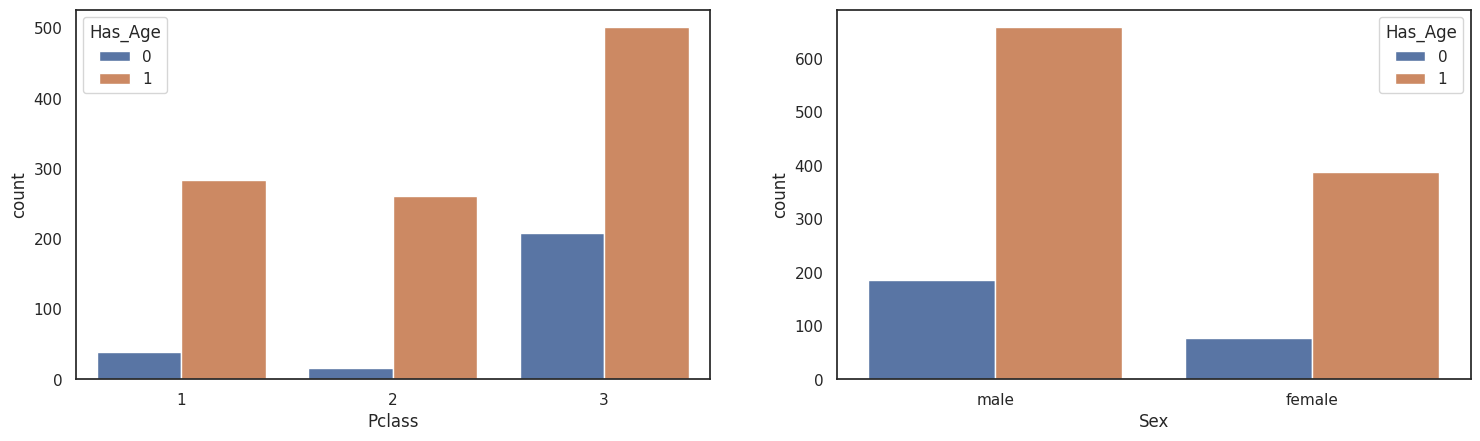

In [ ]:
df_data['Has_Age'] = df_data['Age'].isnull().map(lambda x : 0 if x == True else 1)
fig, [ax1, ax2] = plt.subplots(1, 2)
fig.set_figwidth(18)
ax1 = sns.countplot(data = df_data,x ='Pclass',hue='Has_Age',ax=ax1)
ax2 = sns.countplot(data = df_data,x ='Sex',hue='Has_Age',ax=ax2)
pd.crosstab(df_data['Has_Age'],df_data['Sex'],margins=True).round(3)

Text(0.5, 1.0, 'Age vs Survived in Pclass = 1 and  2')

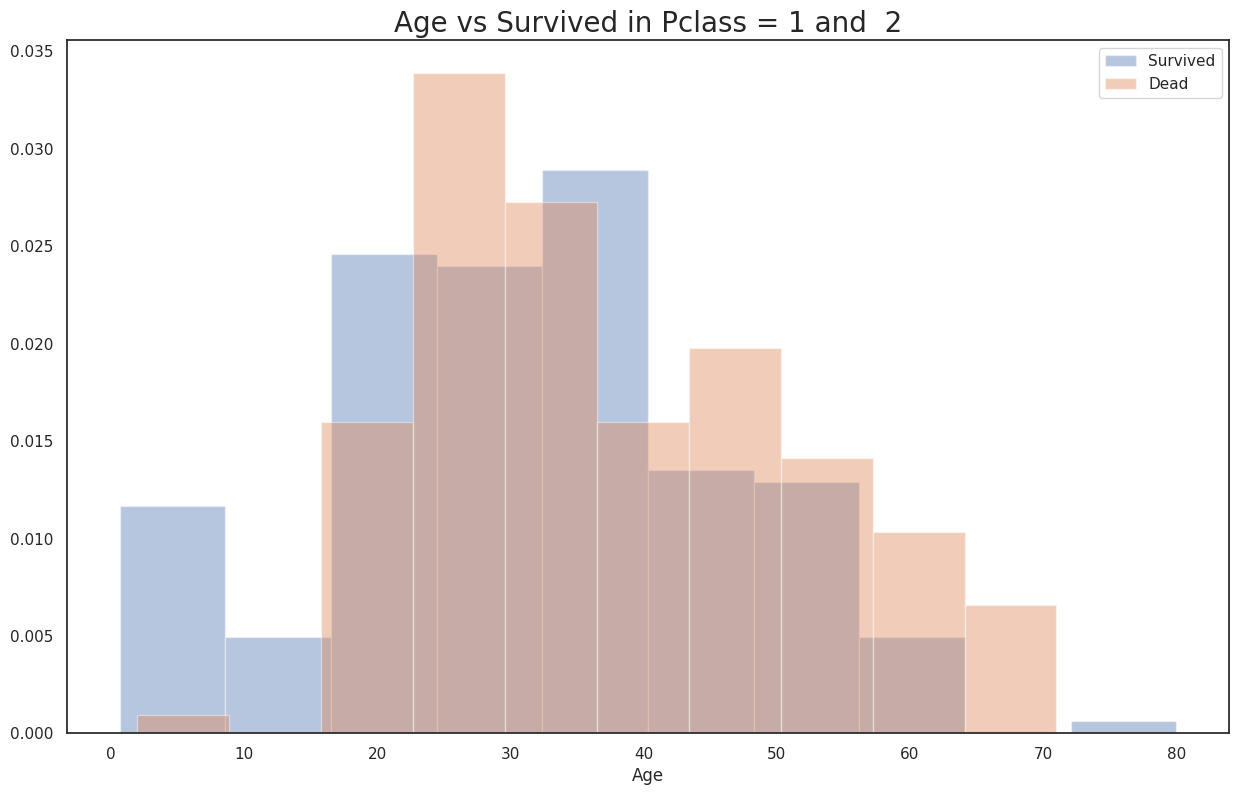

In [ ]:

# Masks
Mask_Has_Age_P12_Survived = ( (df_data.Has_Age == 1) & (df_data.Pclass != 3 ) & (df_data.Survived == 1) )
Mask_Has_Age_P12_Dead = ( (df_data.Has_Age == 1) & (df_data.Pclass != 3 ) & (df_data.Survived == 0) )
# Plot
fig, ax = plt.subplots( figsize = (15,9) )
ax = sns.distplot(df_data.loc[Mask_Has_Age_P12_Survived, 'Age'],kde=False,bins=10,norm_hist=True,label='Survived')
ax = sns.distplot(df_data.loc[Mask_Has_Age_P12_Dead, 'Age'],kde=False,bins=10,norm_hist=True,label='Dead')
ax.legend()
ax.set_title('Age vs Survived in Pclass = 1 and  2',fontsize = 20)

In [ ]:

# extracted title using name
df_data['Title'] = df_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df_data['Title'] = df_data['Title'].replace(['Capt', 'Col', 'Countess', 'Don',
                                               'Dr', 'Dona', 'Jonkheer',
                                                'Major','Rev','Sir'],'Rare')
df_data['Title'] = df_data['Title'].replace(['Mlle', 'Ms','Mme'],'Miss')
df_data['Title'] = df_data['Title'].replace(['Lady'],'Mrs')
df_data['Title'] = df_data['Title'].map({"Mr":0, "Rare" : 1, "Master" : 2,"Miss" : 3, "Mrs" : 4 })
Ti = df_data.groupby('Title')['Age'].median()
Ti

Title
0    29.0
1    47.0
2     4.0
3    22.0
4    36.0
Name: Age, dtype: float64

In [ ]:

# extracted title using name
df_data['Title'] = df_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df_data['Title'] = df_data['Title'].replace(['Capt', 'Col', 'Countess', 'Don',
                                               'Dr', 'Dona', 'Jonkheer',
                                                'Major','Rev','Sir'],'Rare')
df_data['Title'] = df_data['Title'].replace(['Mlle', 'Ms','Mme'],'Miss')
df_data['Title'] = df_data['Title'].replace(['Lady'],'Mrs')
df_data['Title'] = df_data['Title'].map({"Mr":0, "Rare" : 1, "Master" : 2,"Miss" : 3, "Mrs" : 4 })
Ti = df_data.groupby('Title')['Age'].median()
Ti

Title
0    29.0
1    47.0
2     4.0
3    22.0
4    36.0
Name: Age, dtype: float64

In [ ]:
Ti_pred = df_data.groupby('Title')['Age'].median().values
df_data['Ti_Age'] = df_data['Age']
# Filling the missing age
for i in range(0,5):
 # 0 1 2 3 4 5
    df_data.loc[(df_data.Age.isnull()) & (df_data.Title == i),'Ti_Age'] = Ti_pred[i]
df_data['Ti_Age'] = df_data['Ti_Age'].astype('int')
df_data['Ti_Minor'] = ((df_data['Ti_Age']) < 16.0) * 1

In [ ]:
# splits again beacuse we just engineered new feature
df_train = df_data[:len(df_train)]
df_test = df_data[len(df_train):]
# Training set and labels
X = df_train.drop(labels=['Survived','PassengerId'],axis=1)
Y = df_train['Survived']

In [ ]:
minor = ['Sex_Code','Pclass','FareBin_Code_5','Connected_Survival','Ti_Minor']
minor_Model = RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20,oob_score=True)
minor_Model.fit(X[minor], Y)
print('minor oob score :%.5f' %(minor_Model.oob_score_))

minor oob score :0.84175


In [ ]:
# submits
X_Submit = df_test.drop(labels=['PassengerId'],axis=1)

minor_pred = minor_Model.predict(X_Submit[minor])

submit = pd.DataFrame({"PassengerId": df_test['PassengerId'],
                      "Survived":minor_pred.astype(int)})
submit.to_csv("submit_fareBin5.csv",index=False)

### assumption

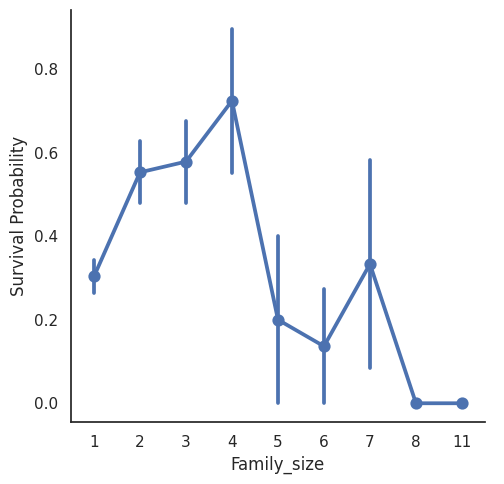

In [ ]:
g = sns.catplot(x='Family_size', y='Survived',data=df_data,kind='point')
g = g.set_ylabels("Survival Probability")

In [ ]:
# cut into 3 class
df_data['L_Family'] = df_data['Family_size'].apply(lambda x: 0 if x<= 4 else 1).astype(int)
df_data.loc[ df_data['Family_size'] == 1, 'FamilyClass'] = 0
df_data.loc[ (df_data['Family_size'] <= 4) & (df_data['Family_size'] > 1), 'FamilyClass'] = 1
df_data.loc[ df_data['Family_size'] >= 5, 'FamilyClass'] = 2
df_data['FamilyClass'] = df_data['FamilyClass'].astype(int)
df_data[['FamilyClass','Survived']].groupby(['FamilyClass']).mean()

Survived
FamilyClass          
0            0.303538
1            0.578767
2            0.161290

<Axes: title={'center': 'Sex'}, xlabel='Family_size'>

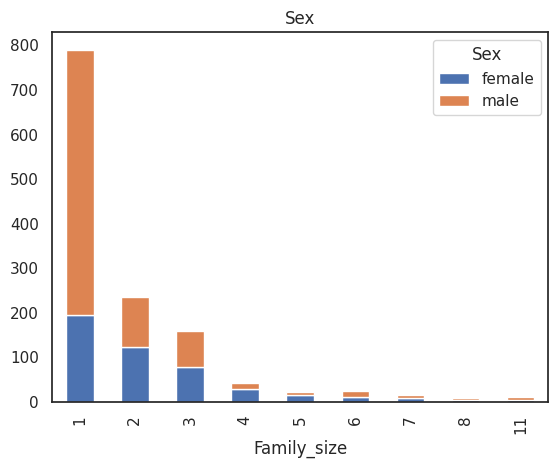

In [ ]:
pd.crosstab(df_data['Family_size'],df_data['Sex']).plot(kind='bar',stacked=True,title="Sex")


<Axes: title={'center': 'Survived Minor counts'}, xlabel='Family_size'>

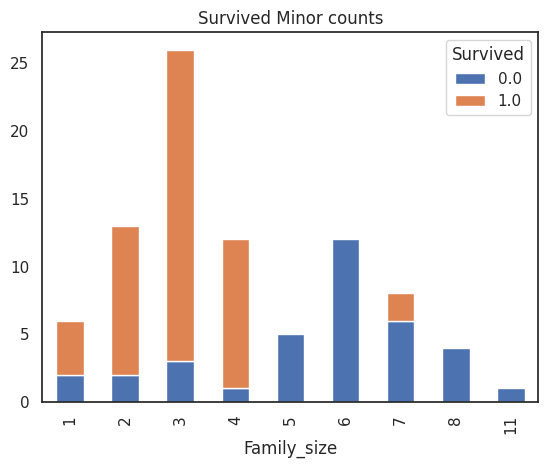

In [ ]:
Minor_mask = (df_data.Ti_Minor == 1)
pd.crosstab(df_data[Minor_mask]['Family_size'],df_data[Minor_mask]['Survived'])\
.plot(kind='bar',stacked=True,title="Survived Minor counts")


## Boston House Pricing

In [ ]:
# loading package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# loading data
df_train = pd.read_csv('https://raw.githubusercontent.com/WangchanTW/Pyladies_DataAnalysis/main/bhprice_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/WangchanTW/Pyladies_DataAnalysis/main/bhprice_test.csv')
boston = pd.concat([df_train,df_test],ignore_index=True)
boston.head()

ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0   1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1   2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2   4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
3   5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
4   7  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   

   ptratio   black  lstat  medv  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     18.7  394.63   2.94  33.4  
3     18.7  396.90   5.33  36.2  
4     15.2  395.60  12.43  22.9

In [ ]:
boston.isnull().sum()

ID           0
crim         0
zn           0
indus        0
chas         0
nox          0
rm           0
age          0
dis          0
rad          0
tax          0
ptratio      0
black        0
lstat        0
medv       173
dtype: int64

In [ ]:
# 遺漏值檢查
# missing_columns=boston.isnull().mean().sort_values(ascending=False)
# missing_columns=missing_columns[missing_columns!=0].to_frame().reset_index()
# # 遺漏率繪圖
# fig,ax=plt.subplots(figsize=(7,7))
# sns.barplot(x=0,y='index',data=missing_columns)

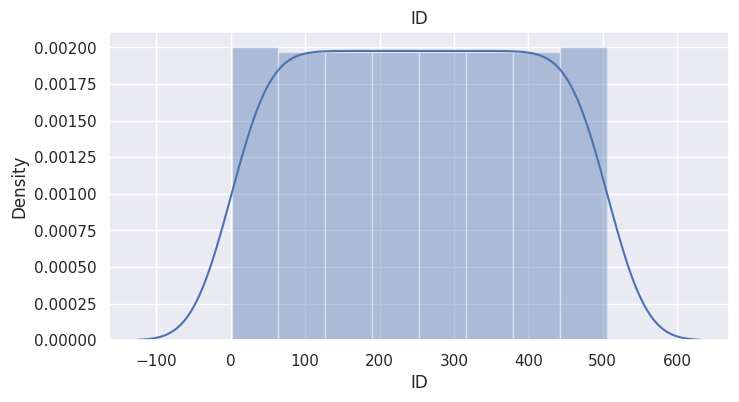

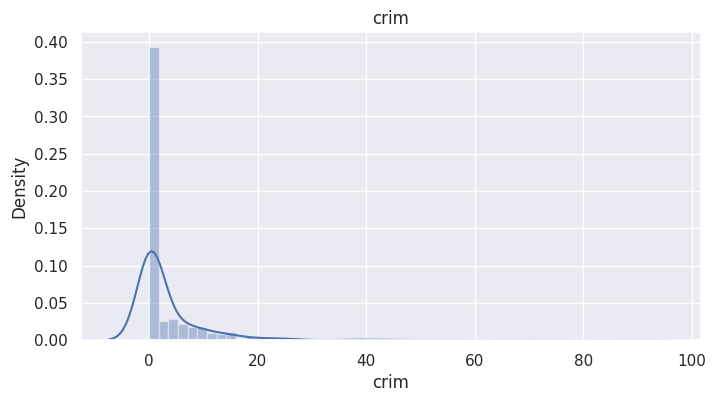

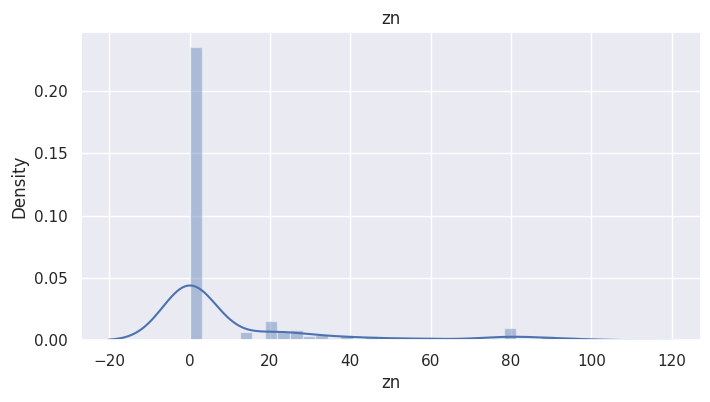

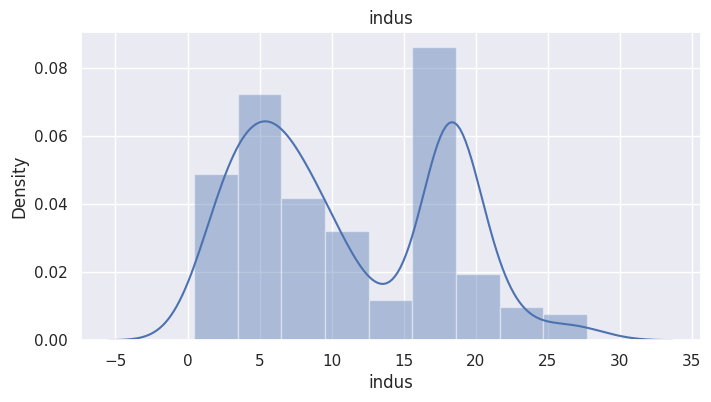

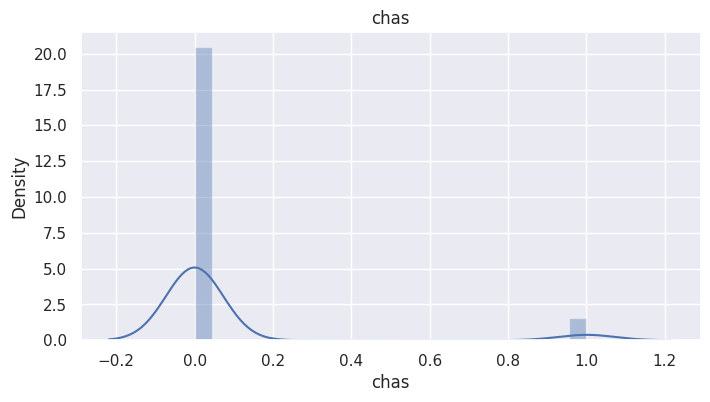

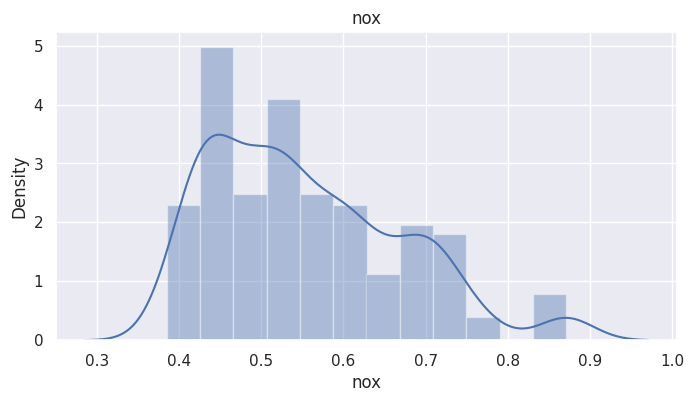

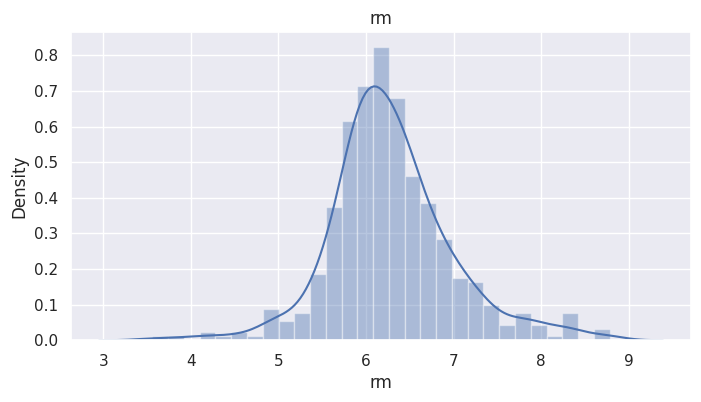

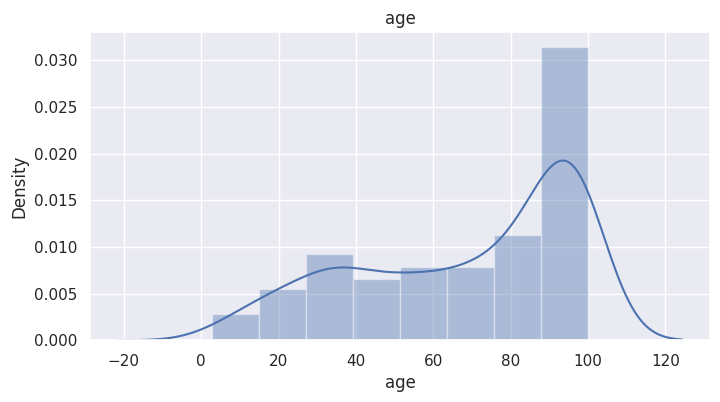

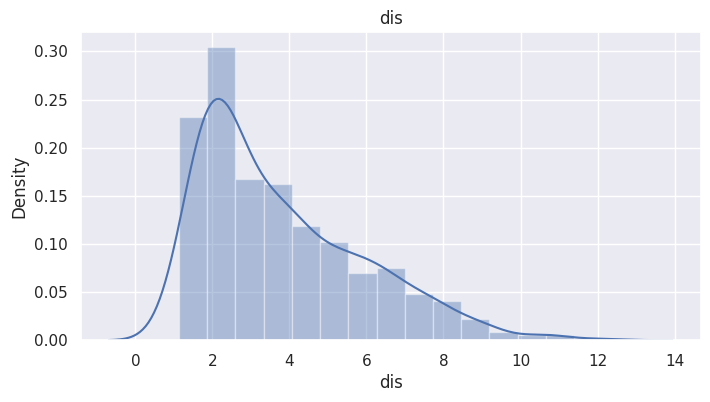

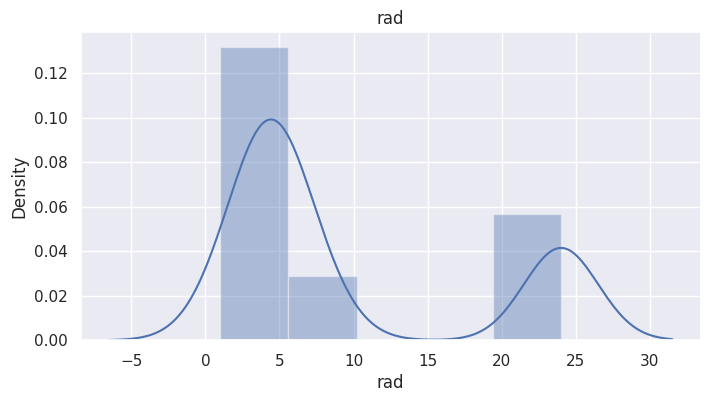

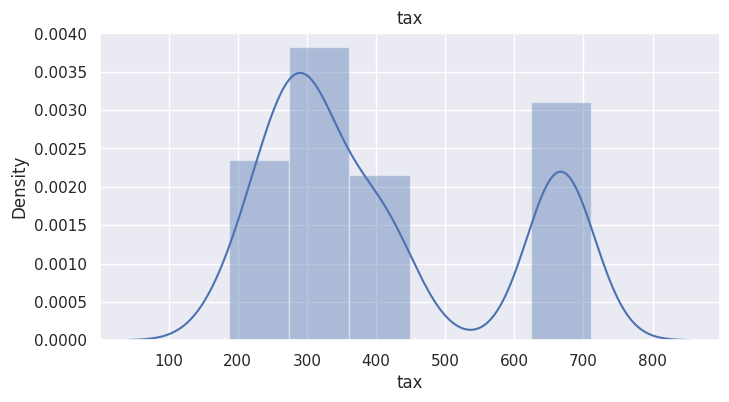

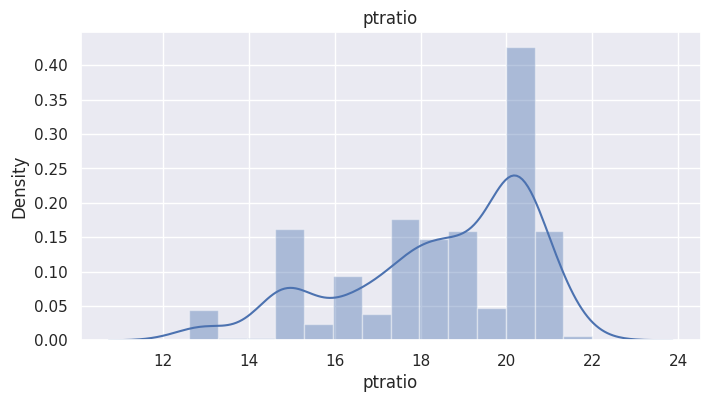

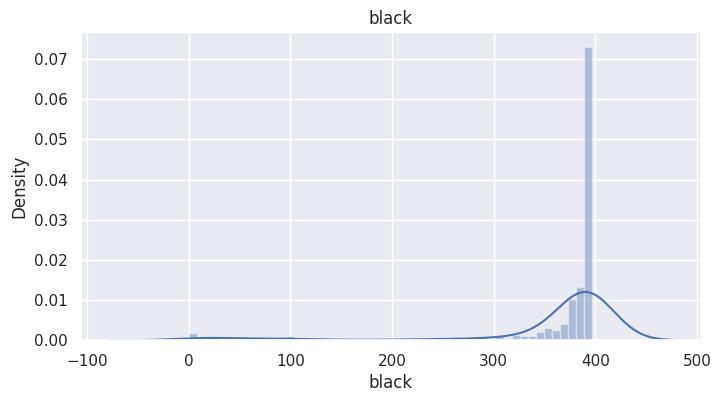

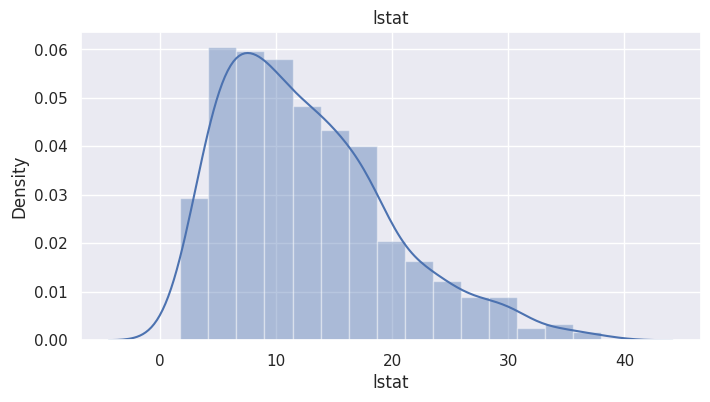

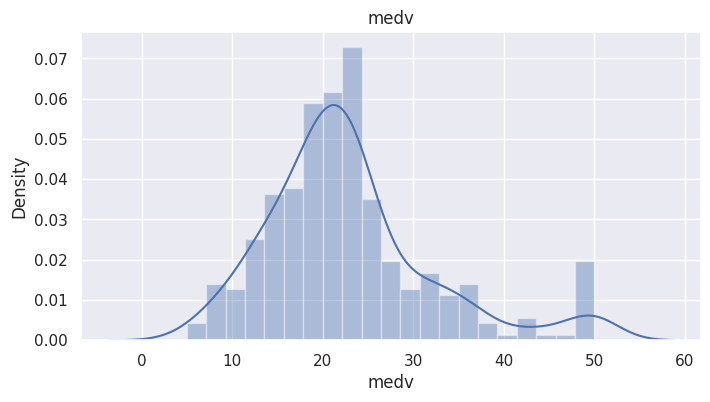

In [ ]:
# KDE-all
num_data=boston.select_dtypes(['int64','float64'])
for i in list(num_data.columns):
    sns.set(rc={"figure.figsize":(8, 4)})
    sns.distplot(num_data[i].dropna(),).set_title(i)
    plt.show()

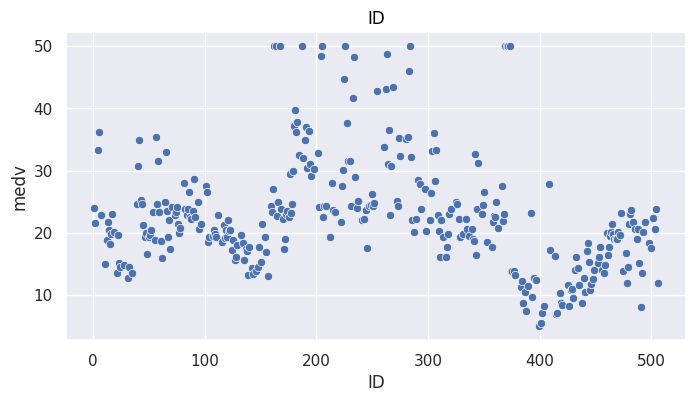

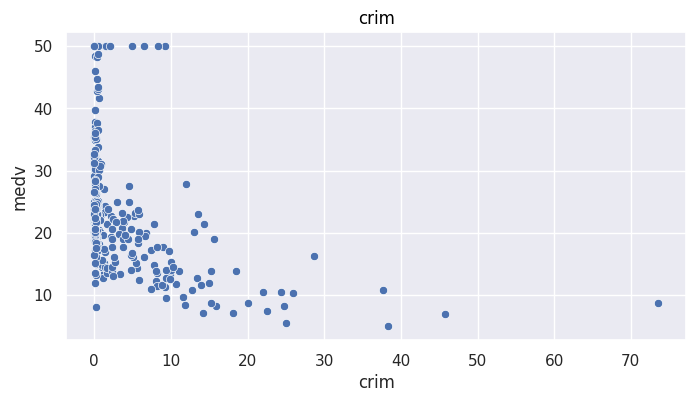

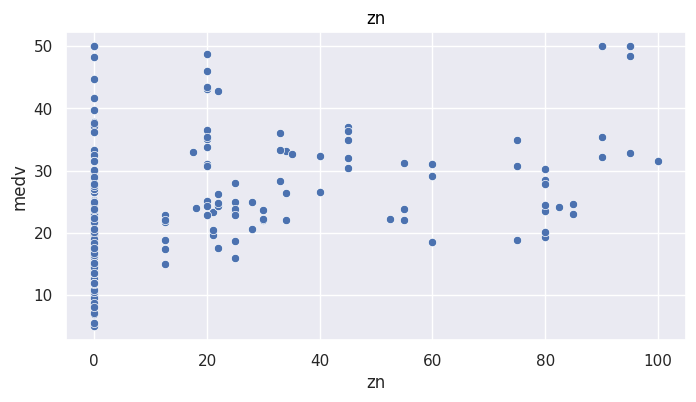

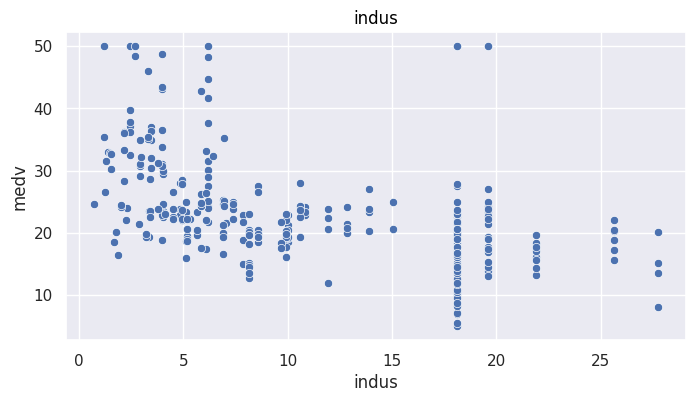

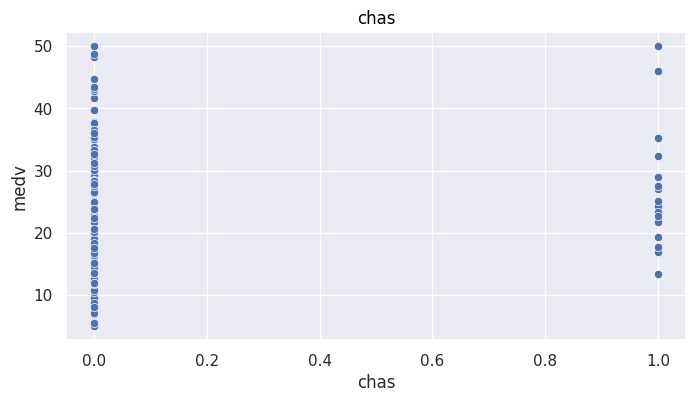

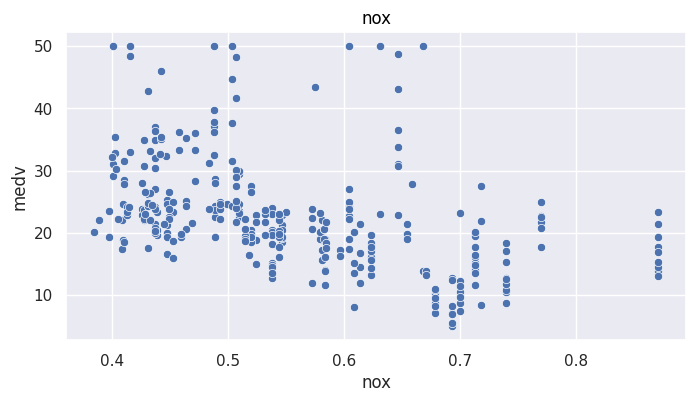

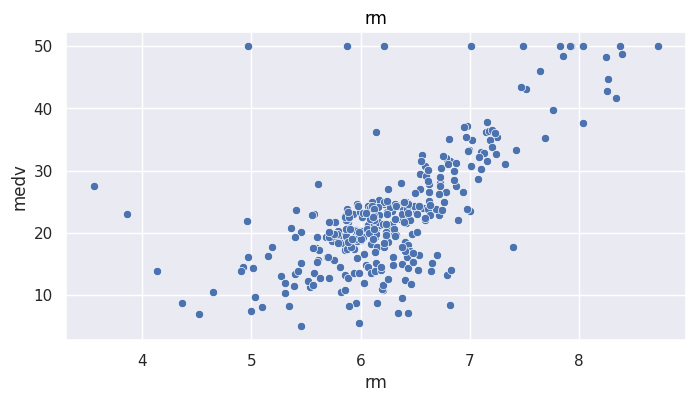

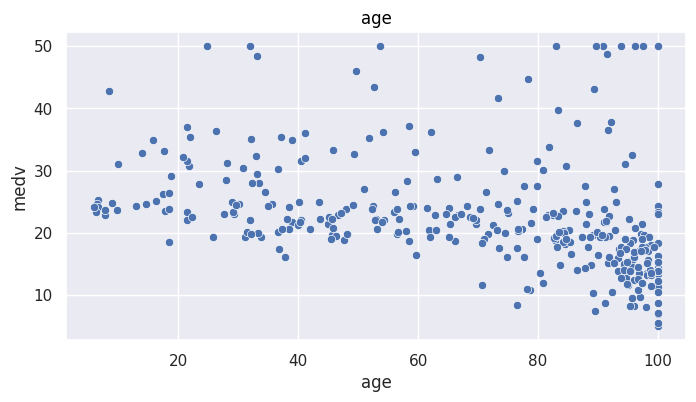

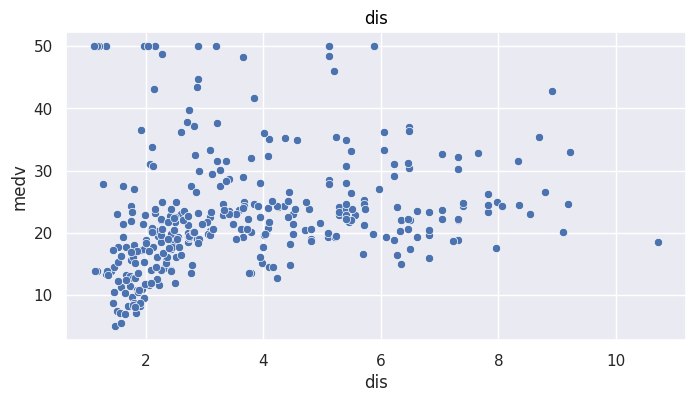

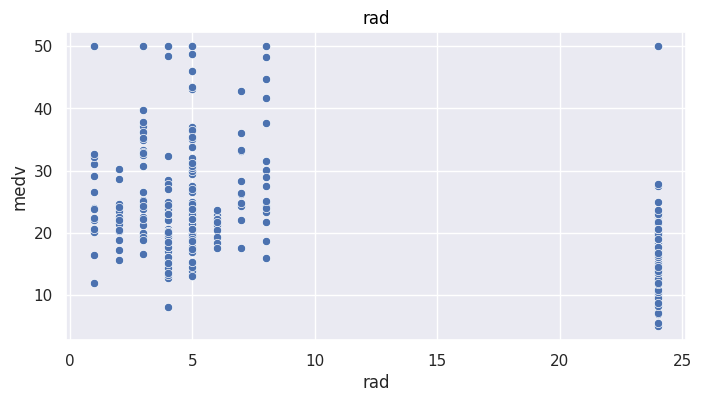

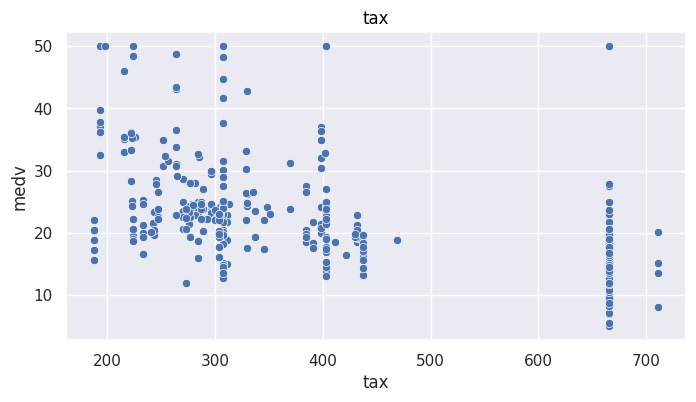

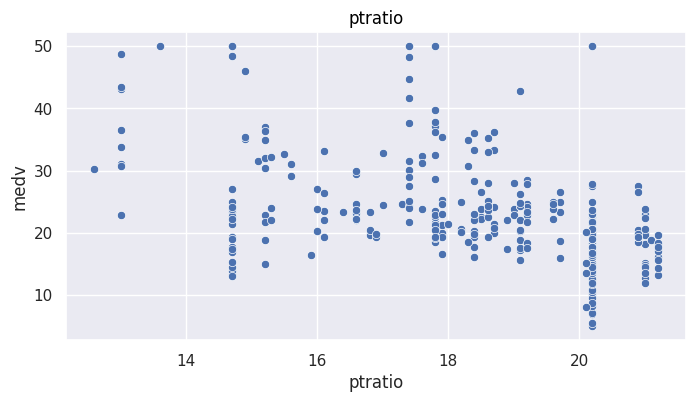

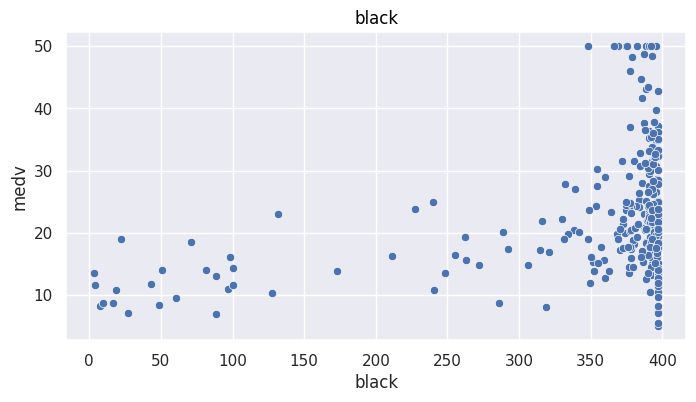

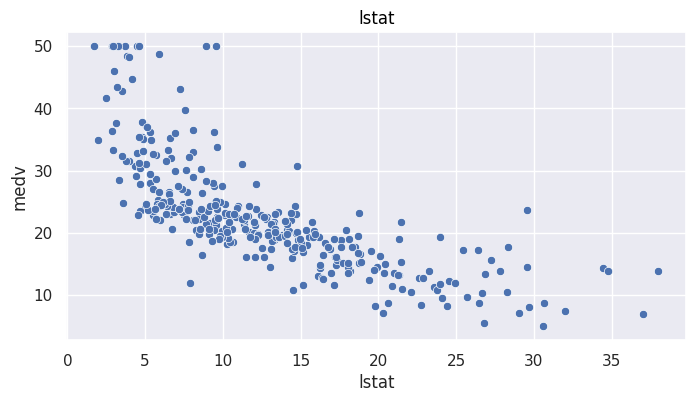

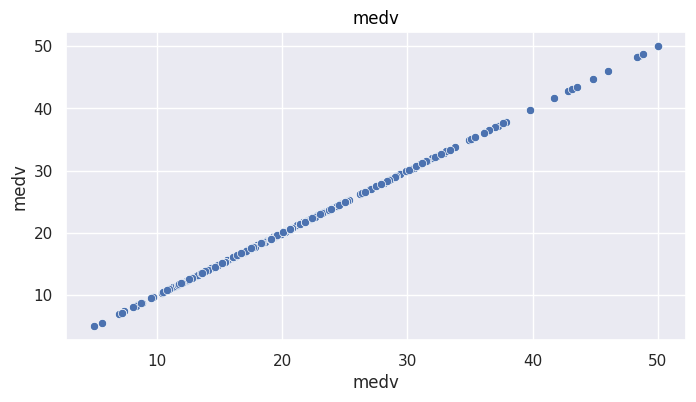

In [ ]:
# 檢查連續變項跟依變數的分布情形
num_train=df_train.select_dtypes(['int64','float64'])
data_remove_outlier=boston[:len(df_train)]
for c in num_train:
    sns.scatterplot(x=c, y="medv", data=data_remove_outlier).set_title(c,fontsize=12,color='Black')
    plt.show()

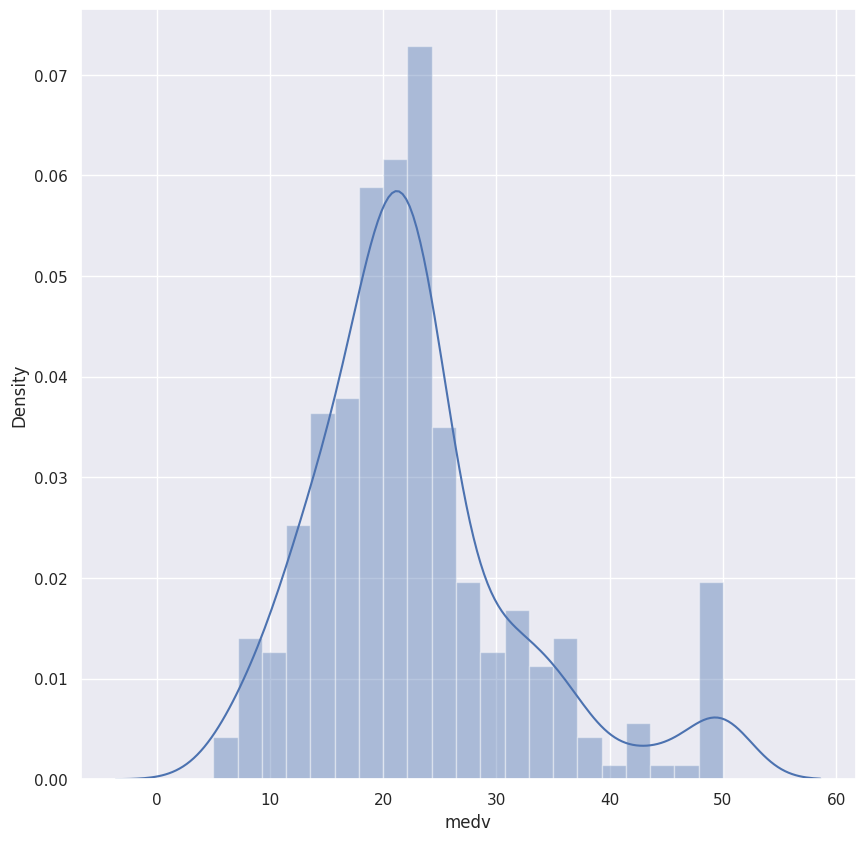

In [ ]:
# 用seaborn一次把圖表的美化格式設定好，這裡是只有先設定圖表長寬
sns.set(rc={'figure.figsize':(10,10)})
# 使用的資料是房價MEDIV
sns.distplot(boston['medv'])
plt.show()

<Axes: >

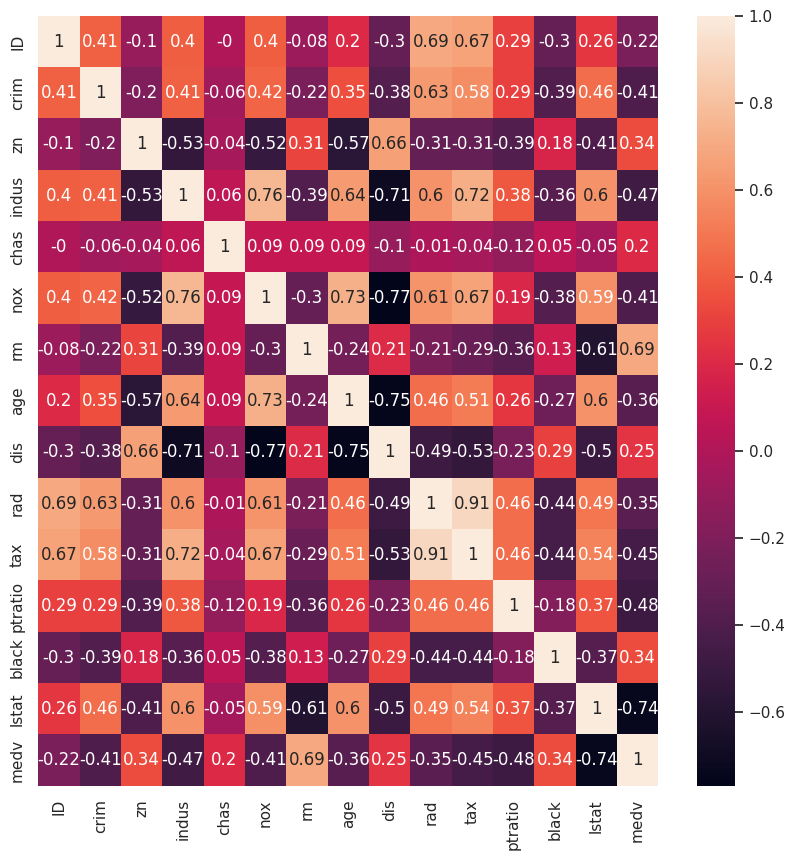

In [ ]:
correlation_matrix = boston.corr().round(2)
# annot = True 讓我們可以把數字標進每個格子裡
sns.heatmap(data=correlation_matrix, annot = True)

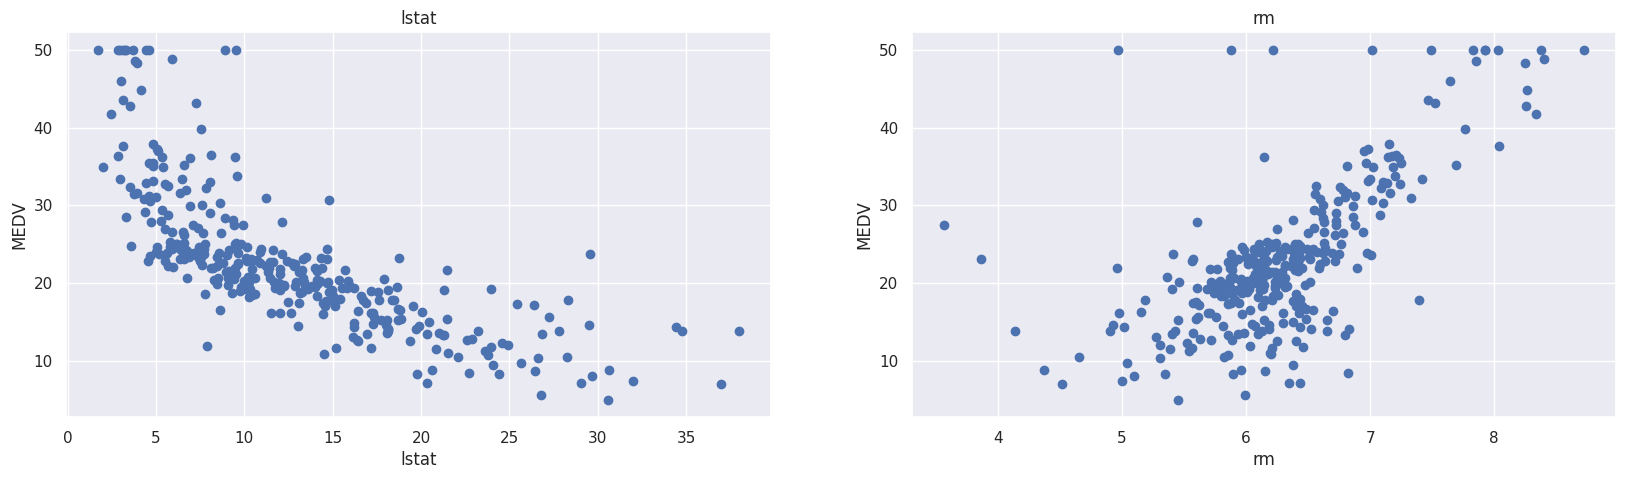

In [ ]:
# 設定整張圖的長寬
plt.figure(figsize=(20, 5))
features = ['lstat', 'rm']
target = boston['medv']
for i, col in enumerate(features):
  # 排版1 row, 2 columns, nth plot：在jupyter notebook上兩張並排
  plt.subplot(1, len(features) , i+1)
  # add data column into plot
  x = boston[col]
  y = target
  plt.scatter(x, y, marker='o')
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel('MEDV')


In [ ]:
X = pd.DataFrame(np.c_[boston['lstat'], boston['rm']], columns = ['lstat','rm'])
Y = boston['medv']

In [ ]:
# Modeling
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# 學習/訓練Fitting linear model
X_train = df_train[['lstat','rm']]
Y_train = df_train['medv']
reg.fit(X_train,Y_train)
# 計算出截距值與係數值
w_0 = reg.intercept_
w_1 = reg.coef_
print('Interception : ', w_0)
print('Coeficient : ', w_1)
print("訓練數據集 R 平方係數 : ", reg.score(X_train, Y_train))

Interception :  0.10394380202171405
Coeficient :  [-0.65639414  4.92846523]
訓練數據集 R 平方係數 :  0.6343339677660716


In [ ]:
# submits
Y_pred = reg.predict(df_test[['lstat','rm']])

submit = pd.DataFrame({"ID": df_test['ID'],
                      "medv":Y_pred.astype(float)})
submit.to_csv("submit_linearReg.csv",index=False)

In [ ]:
from sklearn.linear_model import LassoCV
import sklearn.metrics as sklm
import math
# set cross-validation alpha
alpha=[0.0001,0.001,0.01,0.1,1,10,100]
# find the best alpha and build model
Lasso = LassoCV(cv=5, alphas=alpha)
Lasso_fit=Lasso.fit(X_train, Y_train)
y_lasso_train=Lasso_fit.predict(X_train)
# validation( train data and validate data)
print("訓練數據集 R 平方係數 : ", Lasso.score(X_train, Y_train))
print('RMSE_train_Lasso = ' + str(math.sqrt(sklm.mean_squared_error(Y_train, y_lasso_train))))

訓練數據集 R 平方係數 :  0.6343339308724569
RMSE_train_Lasso = 5.538890867121705


In [ ]:
from sklearn.linear_model import RidgeCV
import sklearn.metrics as sklm
# 設定alpha值範圍
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]

# 使用 RidgeCV 進行訓練
ridgecv = RidgeCV(alphas=alphas, cv=5)
Ridge_fit=ridgecv.fit(X_train, Y_train)

# 印出最佳的 alpha
print("Best alpha:", ridgecv.alpha_)

# 對訓練集和測試集進行預測並印出R平方係數
y_ridge_train = Ridge_fit.predict(X_train)

print("訓練數據集 R 平方係數 : ", ridgecv.score(X_train, Y_train))
print('RMSE_train_Ridge = ' + str(math.sqrt(sklm.mean_squared_error(Y_train, y_ridge_train))))

Best alpha: 100.0
訓練數據集 R 平方係數 :  0.6130180160809833
RMSE_train_Ridge = 5.6980446769588875


In [ ]:
from sklearn.linear_model import ElasticNetCV
# set cross-validation alpha and l1ratio
alpha=[0.0001,0.001,0.01,0.1,1,10,100]
l1ratio = [0.1, 0.5, 0.9, 0.95, 0.99, 1]
# find the best alpha/l1ratio and build model
elastic_cv = ElasticNetCV(cv=5, max_iter=100000, alphas=alpha,  l1_ratio=l1ratio)
elastic_fit = elastic_cv.fit(X_train, Y_train)
y_el_train=elastic_fit.predict(X_train)
# validation( train data and validate data)
print("訓練數據集 R 平方係數 : ", elastic_cv.score(X_train, Y_train))
print('RMSE_train_ElasticNet = ' + str(math.sqrt(sklm.mean_squared_error(Y_train, y_el_train))))

訓練數據集 R 平方係數 :  0.6296499244629203
RMSE_train_ElasticNet = 5.574253247215671


In [ ]:
from sklearn.ensemble import VotingRegressor
# Build Model
vote_mod = VotingRegressor([('Ridge', Ridge_fit), ('Lasso', Lasso_fit) ,('Elastic', elastic_fit)])
vote= vote_mod.fit(X_train, Y_train.ravel())
# predict train/test y
vote_pred_train=vote.predict(X_train)
# validation( train data and validate data)
print('RMSE_train_Voting = ' + str(math.sqrt(sklm.mean_squared_error(Y_train, vote_pred_train))))

RMSE_train_Voting = 5.577521554419029


In [ ]:
from mlxtend.regressor import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
# Build Model
gbdt=GradientBoostingRegressor(learning_rate=0.05,
                               max_leaf_nodes=3,
                              n_estimators=100)
stregr = StackingRegressor(regressors=[Ridge_fit, Lasso_fit, elastic_fit],
                           meta_regressor=gbdt,
                           use_features_in_secondary=True)
stack_mod=stregr.fit(X_train, Y_train.ravel())
# predict train/test y
stacking_pred_train=stack_mod.predict(X_train)
# validation( train data and validate data)
print('RMSE_train_Stacking = ' + str(math.sqrt(sklm.mean_squared_error(Y_train, stacking_pred_train))))

RMSE_train_Stacking = 3.5815618365212734


In [ ]:
# submits
Y_pred = stack_mod.predict(df_test[['lstat','rm']])

submit = pd.DataFrame({"ID": df_test['ID'],
                      "medv":Y_pred.astype(float)})
submit.to_csv("submit_best_price.csv",index=False)